<a href="https://colab.research.google.com/github/Katharina-github/SalesDataAnalysis/blob/main/generate_synthetic_sales_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from faker import Faker
import random
from datetime import datetime, timedelta, date

# Initialize Faker
fake = Faker()

# Define time range
date_start = datetime(2023, 1, 1)
date_end = datetime(2024, 12, 31)

# Generate only dates (without time)
date_range = pd.date_range(date_start, date_end, freq='D').date

annual_growth_rate = 0.08  # (8% annual growth
daily_growth_rate = (1 + annual_growth_rate) ** (1/365) - 1  # Convert to daily growth
trend_factor = 1.0  # Initial trend factor

# Define regions and their sales volume
regions_volume = {
    "Spain": "normal",
    "Italy": "normal",
    "Germany": "high",
    "Netherlands": "high",
    "UK": "low",
    "Ireland": "low"
}

# Define base sales ranges for each sales volume
base_sales_ranges = {
    "low": (10, 30),
    "normal": (20, 50),
    "high": (35, 80)
}

# Define categories and realistic product names
categories = {
    "Seeds": ["Tomato Seeds", "Basil Seeds", "Sunflower Seeds", "Carrot Seeds"],
    "Soil & Fertilizers": ["Organic Compost", "Potting Soil", "Nitrogen Fertilizer", "Mulch"],
    "Gardening Tools": ["Hand Trowel", "Pruning Shears", "Garden Hoe", "Rake"],
    "Outdoor Furniture": ["Garden Bench", "Patio Table", "Lounge Chair", "Swing Seat"],
    "Watering Systems": ["Drip Irrigation Kit", "Sprinkler System", "Watering Can", "Garden Hose"],
    "Pest Control": ["Slug Repellent", "Insect Netting", "Neem Oil Spray", "Ant Killer"],
    "Bulbs": ["Tulip Bulbs", "Daffodil Bulbs", "Lily Bulbs", "Hyacinth Bulbs"],
    "Compost": ["Peat-Free Compost", "Worm Castings", "Leaf Mold", "Manure Compost"],
    "Rakes": ["Leaf Rake", "Garden Rake", "Thatch Rake", "Lawn Rake"],
    "Indoor Plants": ["Snake Plant", "Spider Plant", "Peace Lily", "Aloe Vera"],
    "Pots & Planters": ["Terracotta Pot", "Hanging Basket", "Raised Garden Bed", "Self-Watering Pot"],
    "Decorative Gardening Items": ["Garden Gnome", "Solar Lanterns", "Trellis Arch", "Bird Bath"]
}

# Define realistic price ranges and profit margins per category
price_ranges = {
    "Seeds": (1, 5),  # High margin
    "Soil & Fertilizers": (5, 30),  # Low margin
    "Gardening Tools": (10, 50),  # Medium margin
    "Outdoor Furniture": (50, 500),  # Medium margin
    "Watering Systems": (10, 100),  # Medium margin
    "Pest Control": (5, 40),  # High margin
    "Bulbs": (2, 10),  # High margin
    "Compost": (5, 20),  # Low margin
    "Rakes": (15, 60),  # Medium margin
    "Indoor Plants": (10, 50),  # High margin
    "Pots & Planters": (5, 50),  # Medium margin
    "Decorative Gardening Items": (10, 100)  # High margin
}

# Define updated profit margins per category to ensure profitability after discount
profit_margins = {
    "Seeds": 0.50,
    "Soil & Fertilizers": 0.35,
    "Gardening Tools": 0.38,
    "Outdoor Furniture": 0.40,
    "Watering Systems": 0.38,
    "Pest Control": 0.44,
    "Bulbs": 0.50,
    "Compost": 0.35,
    "Rakes": 0.38,
    "Indoor Plants": 0.50,
    "Pots & Planters": 0.38,
    "Decorative Gardening Items": 0.63
}

shipping_cost_ranges = {
    "Spain": (5, 20),
    "Italy": (10, 30),
    "Germany": (8, 25),
    "Netherlands": (7, 22),
    "UK": (15, 50),
    "Ireland": (20, 50)
}

# Generate Products Table
products = []
product_id = 1
for category, names in categories.items():
    for name in names:
        cost_price = round(random.uniform(price_ranges[category][0], price_ranges[category][1]), 2)
        selling_price = round(cost_price * (1 + profit_margins[category]), 2)  # Ensure selling price > cost price
        products.append([product_id, name, category, cost_price, selling_price, random.randint(1, 10)])  # Popularity
        product_id += 1
products_df = pd.DataFrame(products, columns=["ProductID", "ProductName", "Category", "CostPrice", "SellingPrice", "Popularity"])

# Function to generate buying frequency based on loyalty score
def get_buying_frequency(loyalty_score, segment):
    if segment == 'Retail':
        # Higher loyalty score increases the chance of higher buying frequency
        weights = [1 / (i + 1) for i in range(10)]  # Weights decrease as frequency increases
        weights = [w * (loyalty_score / 10) for w in weights]  # Scale weights by loyalty score
        buying_frequency = random.choices(range(1, 11), weights=weights, k=1)[0]
    else:
        # Wholesale customers have lower buying frequency
        weights = [1 / (i + 1) for i in range(5)]  # Weights decrease as frequency increases
        weights = [w * (loyalty_score / 10) for w in weights]  # Scale weights by loyalty score
        buying_frequency = random.choices(range(1, 6), weights=weights, k=1)[0]
    return buying_frequency

# Generate Customers Table
regions = ["Spain", "Italy", "Germany", "Netherlands", "UK", "Ireland"]
region_weights = [0.3, 0.25, 0.2, 0.15, 0.07, 0.03]  # Higher chance for Germany & Netherlands, lower for UK & Ireland
customers_df = pd.DataFrame({
    'CustomerID': range(1, 25001),
    'CustomerName': [fake.name() for _ in range(25000)],
    'Region': random.choices(regions, weights=region_weights, k=25000),
    'Segment': random.choices(['Retail', 'Wholesale'], weights=[0.9, 0.1], k=25000),
    'LoyaltyScore': [random.randint(1, 10) for _ in range(25000)],
    'Age': [random.randint(20, 70) for _ in range(25000)],
    'Gender': random.choices(['Male', 'Female'], k=25000),
    'JoinDate': [fake.date_between(start_date=date(2020, 1, 1), end_date=date(2024, 12, 31)) for _ in range(25000)],
    'Email': [fake.email() for _ in range(25000)],
    'PhoneNumber': [fake.phone_number() for _ in range(25000)],
    'BuyingFrequency': [get_buying_frequency(score, segment) for score, segment in zip(
        [random.randint(1, 10) for _ in range(25000)],  # LoyaltyScore
        random.choices(['Retail', 'Wholesale'], weights=[0.9, 0.1], k=25000)  # Segment
    )]
})

# check whole function, much bigger effect is definitly  needed or less costs also a bit
# Generate Campaigns
campaigns = []
for campaign_id in range(1, 13):
    campaign = {
        'CampaignID': campaign_id,
        'CampaignName': fake.catch_phrase(),
        'StartDate': fake.date_between(start_date=date(2022, 12, 2), end_date=date(2024, 12, 1)),
        'Region': random.choice(regions),
        'Budget': round(random.uniform(20000, 200000), 2)
    }
    campaign['EndDate'] = campaign['StartDate'] + timedelta(days=random.randint(30, 120))

    # Adjust impact calculation based on budget
    budget = campaign['Budget']

    # Reduce the campaign effect to more reasonable levels
    if budget > 150000:  # High budget campaigns
        impact = random.uniform(1.07, 1.1)
    elif budget > 80000:  # Medium budget campaigns
        impact = random.uniform(1.04, 1.07)
    else:  # Low budget campaigns
        impact = random.uniform(1.01, 1.04)

    # Apply regional boost for UK and Ireland
    if campaign['Region'] in ["UK", "Ireland"]:
        impact *= 1.08

    # Cap the maximum impact to prevent extreme values
    campaign['Impact'] = min(impact, 1.1)

    # Append the campaign to the campaigns list
    campaigns.append(campaign)

# Convert the list of campaigns to a DataFrame
campaigns_df = pd.DataFrame(campaigns)


# Define region-specific seasonality factors
seasonality_countries = {
    "Spain": {1: 0.6, 2: 0.7, 3: 0.9, 4: 1.2, 5: 1.5, 6: 1.6, 7: 1.5, 8: 1.4, 9: 1.3, 10: 1.1, 11: 0.8, 12: 0.7},
    "Italy": {1: 0.6, 2: 0.7, 3: 0.9, 4: 1.2, 5: 1.5, 6: 1.6, 7: 1.5, 8: 1.4, 9: 1.3, 10: 1.1, 11: 0.8, 12: 0.7},
    "Germany": {1: 0.4, 2: 0.5, 3: 0.8, 4: 1.3, 5: 1.7, 6: 1.8, 7: 1.5, 8: 1.3, 9: 1.0, 10: 0.8, 11: 0.5, 12: 0.4},
    "Netherlands": {1: 0.4, 2: 0.5, 3: 0.8, 4: 1.3, 5: 1.7, 6: 1.8, 7: 1.5, 8: 1.3, 9: 1.0, 10: 0.8, 11: 0.5, 12: 0.4},
    "UK": {1: 0.5, 2: 0.6, 3: 0.9, 4: 1.3, 5: 1.6, 6: 1.7, 7: 1.5, 8: 1.3, 9: 1.1, 10: 0.9, 11: 0.6, 12: 0.5},
    "Ireland": {1: 0.5, 2: 0.6, 3: 0.9, 4: 1.3, 5: 1.6, 6: 1.7, 7: 1.5, 8: 1.3, 9: 1.1, 10: 0.9, 11: 0.6, 12: 0.5}
}

seasonality_categories = {
    "Seeds": {1: 0.7, 2: 0.9, 3: 1.4, 4: 1.5, 5: 1.4, 6: 1.2, 7: 1.0, 8: 0.9, 9: 0.8, 10: 0.7, 11: 0.7, 12: 0.7},
    "Soil & Fertilizers": {1: 0.8, 2: 1.0, 3: 1.4, 4: 1.5, 5: 1.3, 6: 1.0, 7: 0.9, 8: 0.8, 9: 0.7, 10: 0.7, 11: 0.7, 12: 0.7},
    "Gardening Tools": {1: 0.6, 2: 0.8, 3: 1.2, 4: 1.3, 5: 1.4, 6: 1.5, 7: 1.3, 8: 1.2, 9: 1.0, 10: 0.9, 11: 0.7, 12: 0.6},
    "Outdoor Furniture": {1: 0.5, 2: 0.6, 3: 0.8, 4: 1.1, 5: 1.2, 6: 1.3, 7: 1.4, 8: 1.4, 9: 1.1, 10: 0.9, 11: 0.7, 12: 0.6},
    "Watering Systems": {1: 0.5, 2: 0.7, 3: 1.0, 4: 1.2, 5: 1.4, 6: 1.6, 7: 1.7, 8: 1.6, 9: 1.4, 10: 1.0, 11: 0.8, 12: 0.6},
    "Pest Control": {1: 0.4, 2: 0.6, 3: 1.0, 4: 1.3, 5: 1.5, 6: 1.6, 7: 1.5, 8: 1.4, 9: 1.2, 10: 1.0, 11: 0.7, 12: 0.5},
    "Bulbs": {1: 0.6, 2: 0.8, 3: 1.2, 4: 1.3, 5: 1.1, 6: 0.9, 7: 0.8, 8: 0.7, 9: 1.1, 10: 1.4, 11: 1.5, 12: 1.3},
    "Compost": {1: 0.7, 2: 0.8, 3: 1.0, 4: 1.2, 5: 1.3, 6: 1.1, 7: 1.0, 8: 0.9, 9: 1.4, 10: 1.5, 11: 1.4, 12: 1.0},
    "Rakes": {1: 0.5, 2: 0.6, 3: 0.8, 4: 1.0, 5: 1.1, 6: 1.2, 7: 1.1, 8: 1.0, 9: 1.4, 10: 1.6, 11: 1.5, 12: 1.2},
    "Indoor Plants": {1: 1.1, 2: 1.1, 3: 1.0, 4: 1.0, 5: 1.2, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0, 10: 1.1, 11: 1.2, 12: 1.4},
    "Pots & Planters": {1: 0.6, 2: 0.8, 3: 1.1, 4: 1.3, 5: 1.5, 6: 1.4, 7: 1.3, 8: 1.2, 9: 1.0, 10: 0.9, 11: 0.7, 12: 0.6},
    "Decorative Gardening Items": {1: 1.1, 2: 1.1, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 1.0, 9: 1.0, 10: 1.1, 11: 1.2, 12: 1.3}
}

# Customer preference function
def get_customer_preference(age, category):
    if age >= 50 and category in ["Gardening Tools", "Outdoor Furniture", "Bulbs"]:
        return 1.5  # Older customers prefer traditional items
    elif age <= 35 and category in ["Indoor Plants", "Decorative Gardening Items"]:
        return 1.5  # Younger customers prefer trendy items
    else:
        return 1.0

# Function to select a product based on seasonality and customer preferences
def select_product(this_date, age, products_df, seasonality_categories):
    month = this_date.month
    category_weights = {}
    for category, factors in seasonality_categories.items():
        seasonality_weight = factors[month]
        preference_weight = get_customer_preference(age, category)
        category_weights[category] = seasonality_weight * preference_weight
    total_weight = sum(category_weights.values())
    category_weights = {k: v / total_weight for k, v in category_weights.items()}
    selected_category = random.choices(list(category_weights.keys()), weights=list(category_weights.values()), k=1)[0]
    category_products = products_df[products_df['Category'] == selected_category]
    # Reset index to avoid KeyError
    category_products = category_products.reset_index(drop=True)
    product_id = random.choices(category_products['ProductID'], weights=category_products['Popularity'], k=1)[0]
    return product_id

# Category discount modifiers (some categories get higher/lower discounts)
category_discounts = {
    "Seeds": 1.1,  # Seeds often have small discounts
    "Soil & Fertilizers": 0.9,  # Less discount on essential gardening needs
    "Gardening Tools": 1.0,  # Normal discount
    "Outdoor Furniture": 1.2,  # Bigger discounts on expensive furniture
    "Watering Systems": 1.0,  # Normal discount
    "Pest Control": 0.8,  # Lower discounts (essential)
    "Bulbs": 1.1,  # More discount (seasonal promotions)
    "Compost": 0.9,  # Less discount (high demand)
    "Rakes": 1.0,  # Normal discount
    "Indoor Plants": 1.2,  # More discounts (encourage sales)
    "Pots & Planters": 1.1,  # Slightly higher discount
    "Decorative Gardening Items": 1.3  # High discounts (not essential)
}

# Function to calculate discount
# Needs to be changed - Now the discount rate/ quantity sold ratio is in some cases unrealistic - change to gauß distribution with
# different mean for each product category and a fitting diviation, add a little discount for high quantity and loyalty score,
# dont delete old code in case the new data is more unrealistic
def get_discount(quantity, loyalty_score, category):
    base_discount = min(0.25, 0.05 * (quantity // 10) + 0.02 * loyalty_score)

    # Apply category modifier
    category_factor = category_discounts.get(category, 1.0)
    adjusted_discount = base_discount * category_factor

    # Add controlled randomness (-0.02 to +0.02, ensuring average stays the same)
    random_adjustment = random.uniform(-0.02, 0.02)
    final_discount = max(0, min(0.25, adjusted_discount + random_adjustment))

    return round(final_discount, 2)


# Generate Inventory Table
inventory = []
for product_id in products_df['ProductID']:
    category = products_df.loc[products_df['ProductID'] == product_id, 'Category'].values[0]
    popularity = products_df.loc[products_df['ProductID'] == product_id, 'Popularity'].values[0]
    stock_level = random.randint(40, 100) * (popularity / 10)  # Higher stock for popular items
    reorder_point = random.randint(25, 50)
    inventory.append([product_id, stock_level, reorder_point])
inventory_df = pd.DataFrame(inventory, columns=["ProductID", "StockLevel", "ReorderPoint"])

# Generate inventory snapshot list
inventory_snapshots = []  # Empty list to store snapshot data

# Generate sales data
sales = []
not_realized_purchases = []
sale_id = 0
snapshot_counter = 0

for date in date_range:
    for region, volume in regions_volume.items():
        base_sales = random.randint(base_sales_ranges[volume][0], base_sales_ranges[volume][1])
        seasonality = seasonality_countries[region][date.month]
        campaign_factor = 1.0
        for campaign in campaigns:
            start_date = campaign['StartDate']
            end_date = campaign['EndDate']
            if campaign['Region'] == region and start_date <= date <= end_date:
                campaign_factor *= campaign['Impact']
        adjusted_sales = int(base_sales * seasonality * campaign_factor * trend_factor)
        if date.weekday() >= 5:  # Weekend multiplier
            adjusted_sales = int(adjusted_sales * 1.3)
        adjusted_sales += random.randint(-5, 10)

        for _ in range(adjusted_sales):
            region_customers = customers_df[customers_df['Region'] == region]
            # Filter customers by region and JoinDate
            region_customers = customers_df[(customers_df['Region'] == region) & (customers_df['JoinDate'] <= date)]
            customer = region_customers.sample(1, weights=region_customers['BuyingFrequency'] / region_customers['BuyingFrequency'].sum()).iloc[0]
            customer_id = customer['CustomerID']
            segment = customer['Segment']
            age = customer['Age']
            # Determine product
            product_id = select_product(date, age, products_df, seasonality_categories)
            category = products_df.loc[products_df['ProductID'] == product_id, 'Category'].values[0]
            loyalty_score = customer['LoyaltyScore']
            selling_price = products_df.loc[products_df['ProductID'] == product_id, 'SellingPrice'].values[0]

            # Determine quantity
            # Determine price range
            if selling_price <= 20:
                price_range = 'Low'
            elif selling_price <= 199:
                price_range = 'Mid'
            else:
                price_range = 'High'

            # Adjust quantity based on price range and customer segment
            if segment == 'Wholesale':
                if price_range == 'Low':
                    quantity = random.randint(5, 50)  # Higher quantities for low-priced items
                elif price_range == 'Mid':
                    quantity = random.randint(2, 20)  # Moderate quantities for mid-priced items
                else:
                    quantity = random.randint(1, 5)  # Smaller quantities for high-priced items
            else:  # Retail customers
                if price_range == 'Low':
                    quantity = random.choice([1, 2, 3, 4, 5])  # Higher quantities for low-priced items
                elif price_range == 'Mid':
                    quantity = random.choice([1, 1, 2, 2, 3])  # Moderate quantities for mid-priced items
                else:
                    quantity = 1  # Smaller quantities for high-priced items

            discount_rate = get_discount(quantity, loyalty_score, category)
            discount_amount = round(quantity * selling_price * discount_rate, 2)
            sales_amount = round((quantity * selling_price) - discount_amount, 2)
            payment_method = random.choice(['Credit Card', 'PayPal', 'Bank Transfer'])
            min_cost, max_cost = shipping_cost_ranges.get(region, (5, 50))  # Default to (5,50) if region not found
            shipping_cost = round(random.uniform(min_cost, max_cost), 2)

            #Check if inventory is sufficient
            stock_level = inventory_df.loc[inventory_df['ProductID'] == product_id, 'StockLevel'].values[0]
            if stock_level >= quantity:
                inventory_df.loc[inventory_df['ProductID'] == product_id, 'StockLevel'] -= quantity
                sales.append([sale_id, date, product_id, customer_id, region, sales_amount, selling_price, discount_rate, discount_amount, quantity, payment_method, shipping_cost])
                customers_df.loc[customers_df['CustomerID'] == customer_id, 'LoyaltyScore'] += 1
                sale_id += 1
            else:
                not_realized_purchases.append([sale_id, date, product_id, customer_id, region, sales_amount, selling_price, discount_rate, discount_amount, quantity, payment_method, shipping_cost])

    # Take pre-restock snapshot
    for index, row in inventory_df.iterrows():
        inventory_snapshots.append([snapshot_counter, row['ProductID'], date, row['StockLevel'], 'pre_restock'])
        snapshot_counter += 1

    # Update trend_factor for the next day
    trend_factor *= (1 + daily_growth_rate)

    # Restock inventory at the end of the day
    for index, row in inventory_df.iterrows():
        if row['StockLevel'] <= row['ReorderPoint']:
            inventory_df.at[index, 'StockLevel'] += random.randint(25, 50)

    # Take post-restock snapshot
    for index, row in inventory_df.iterrows():
        inventory_snapshots.append([snapshot_counter, row['ProductID'], date, row['StockLevel'], 'post_restock'])
        snapshot_counter += 1

# Create DataFrames
sales_df = pd.DataFrame(sales, columns=["SaleID", "SalesDate", "ProductID", "CustomerID", "Region", "SalesAmount", "Price", "DiscountRate", "DiscountAmount", "Quantity", "PaymentMethod", "ShippingCost"])
not_realized_purchases_df = pd.DataFrame(not_realized_purchases, columns=["SaleID", "SalesDate", "ProductID", "CustomerID", "Region", "SalesAmount", "Price", "DiscountRate", "DiscountAmount", "Quantity", "PaymentMethod", "ShippingCost"])
inventory_snapshots_df = pd.DataFrame(inventory_snapshots, columns=["SnapshotID", "ProductID", "Date", "StockLevel", "SnapshotType"])

# Generate returns
def get_return_rate(category, price):
    base_rate = 0.1  # Default return rate
    if category in ["Indoor Plants"]:
        base_rate = 0.2  # 20% return rate for fragile items
    elif category in ["Outdoor Furniture"]:
        base_rate = 0.15  # 15% return rate for expensive items
    elif category in ["Seeds", "Soil & Fertilizers"]:
        base_rate = 0.05  # 5% return rate for low-cost items

    # Adjust return rate based on price
    if price > 100:  # Expensive items have a higher return rate
        base_rate += 0.05
    elif price < 20:  # Cheap items have a lower return rate
        base_rate -= 0.03

    return max(0, min(base_rate, 1))  # Ensure the rate is between 0 and 1

def generate_return_date(sale_date):
    # Generate a return date within 7 to 30 days after the sale date
    return_date = sale_date + timedelta(days=random.randint(7, 30))
    return return_date

def get_return_reason(category):
    reason_weights = {
        "Indoor Plants": {'Defective': 4, 'Damaged during shipping': 3, 'Customer Changed Mind': 2},
        "Outdoor Furniture": {'Defective': 3, 'Did not meet expectations': 4, 'Wrong Item': 2},
        "Seeds": {'Product expired': 5, 'Wrong Item': 3, 'Customer Changed Mind': 1},
        "Soil & Fertilizers": {'Product expired': 4, 'Wrong Item': 3, 'Customer Changed Mind': 2},
        "Other": {'Defective': 3, 'Wrong Item': 2, 'Customer Changed Mind': 2, 'Late Delivery': 3}
    }
    reasons, weights = zip(*reason_weights.get(category, reason_weights["Other"]).items())
    return random.choices(reasons, weights=weights, k=1)[0]

# Define the cutoff date for returns
CUTOFF_DATE = datetime(2024, 12, 31)

returns = []
for return_id in range(1, 105001):
    sale_id = random.choice(sales_df['SaleID'].tolist())
    product_id = sales_df.loc[sales_df['SaleID'] == sale_id, 'ProductID'].values[0]
    category = products_df.loc[products_df['ProductID'] == product_id, 'Category'].values[0]
    sale_date = sales_df.loc[sales_df['SaleID'] == sale_id, 'SalesDate'].values[0]
    price = sales_df.loc[sales_df['SaleID'] == sale_id, 'Price'].values[0]

    # If you need a datetime object, use datetime.combine
    sale_date = datetime.combine(sale_date, datetime.min.time())

    # Get the return probability for the category
    return_probability = get_return_rate(category, price)

    # Use random.choices with weights to decide if the item is returned
    is_returned = random.choices([True, False], weights=[return_probability, 1 - return_probability], k=1)[0]

    if is_returned:
        return_date = generate_return_date(sale_date)

        # Check if the return date is before the cutoff date (31.12.2024)
        if return_date <= CUTOFF_DATE:
            reason = get_return_reason(category)
            returns.append([return_id, sale_id, return_date.strftime("%Y-%m-%d"), reason])

# Create DataFrame
returns_df = pd.DataFrame(returns, columns=["ReturnID", "SaleID", "ReturnDate", "Reason"])


# Save to CSV
products_df.to_csv('products.csv', index=False)
customers_df.to_csv('customers.csv', index=False)
sales_df.to_csv('sales.csv', index=False)
returns_df.to_csv('returns.csv', index=False)
campaigns_df.to_csv('campaigns.csv', index=False)
inventory_df.to_csv('inventory.csv', index=False)
not_realized_purchases_df.to_csv('not_realized_purchases.csv', index=False)
inventory_snapshots_df.to_csv('inventory_snapshots.csv', index=False)

# **Data check**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

In [2]:
#Loading the data from personal device - if the engine was disconnected
from google.colab import files

# This will prompt you to upload a file from your device
uploaded = files.upload()

Saving sales(3).csv to sales(3).csv
Saving returns(3).csv to returns(3).csv
Saving products(3).csv to products(3).csv
Saving not_realized_purchases(3).csv to not_realized_purchases(3).csv
Saving inventory_snapshots(2).csv to inventory_snapshots(2).csv
Saving inventory(3).csv to inventory(3).csv
Saving customers(3).csv to customers(3).csv
Saving campaigns(3).csv to campaigns(3).csv


In [3]:
products_df = pd.read_csv('products(3).csv')
customers_df = pd.read_csv('customers(3).csv')
sales_df = pd.read_csv('sales(3).csv')
returns_df = pd.read_csv('returns(3).csv')
campaigns_df = pd.read_csv('campaigns(3).csv')
inventory_df = pd.read_csv('inventory(3).csv')
not_realized_purchases_df = pd.read_csv('not_realized_purchases(3).csv')
inventory_snapshots_df = pd.read_csv('inventory_snapshots(2).csv')

In [ ]:
# View all columns in each dataframe
print("Products DataFrame Columns:", products_df.columns.tolist())
print("Customers DataFrame Columns:", customers_df.columns.tolist())
print("Sales DataFrame Columns:", sales_df.columns.tolist())
print("Returns DataFrame Columns:", returns_df.columns.tolist())
print("Campaigns DataFrame Columns:", campaigns_df.columns.tolist())
print("Inventory DataFrame Columns:", inventory_df.columns.tolist())
print("Not Realized Purchases DataFrame Columns:", not_realized_purchases_df.columns.tolist())
print("Inventory Snapshots DataFrame Columns:", inventory_snapshots_df.columns.tolist())

Products DataFrame Columns: ['ProductID', 'ProductName', 'Category', 'CostPrice', 'SellingPrice', 'Popularity']
Customers DataFrame Columns: ['CustomerID', 'CustomerName', 'Region', 'Segment', 'LoyaltyScore', 'Age', 'Gender', 'JoinDate', 'Email', 'PhoneNumber', 'BuyingFrequency']
Sales DataFrame Columns: ['SaleID', 'SalesDate', 'ProductID', 'CustomerID', 'Region', 'SalesAmount', 'Price', 'DiscountRate', 'DiscountAmount', 'Quantity', 'PaymentMethod', 'ShippingCost']
Returns DataFrame Columns: ['ReturnID', 'SaleID', 'ReturnDate', 'Reason']
Campaigns DataFrame Columns: ['CampaignID', 'CampaignName', 'StartDate', 'Region', 'Budget', 'EndDate', 'Impact']
Inventory DataFrame Columns: ['ProductID', 'StockLevel', 'ReorderPoint']
Not Realized Purchases DataFrame Columns: ['SaleID', 'SalesDate', 'ProductID', 'CustomerID', 'Region', 'SalesAmount', 'Price', 'DiscountRate', 'DiscountAmount', 'Quantity', 'PaymentMethod', 'ShippingCost']
Inventory Snapshots DataFrame Columns: ['ProductID', 'Date', 'S

In [ ]:
#def check_data_quality(products_df, customers_df, sales_df, returns_df, campaigns_df):
def check_data_quality(products_df, customers_df, sales_df, campaigns_df):
    results = {}

    # Check for duplicates
    results['duplicates'] = {
        'products': products_df.duplicated().sum(),
        'customers': customers_df.duplicated().sum(),
        'sales': sales_df.duplicated().sum(),
        #'returns': returns_df.duplicated().sum(),
        'campaigns': campaigns_df.duplicated().sum()
    }

    # Check for missing values
    results['missing_values'] = {
        'products': products_df.isnull().sum().to_dict(),
        'customers': customers_df.isnull().sum().to_dict(),
        'sales': sales_df.isnull().sum().to_dict(),
        #'returns': returns_df.isnull().sum().to_dict(),
        'campaigns': campaigns_df.isnull().sum().to_dict()
    }

    # Check for invalid sales (Negative values)
    results['invalid_sales'] = sales_df[(sales_df['SalesAmount'] < 0) | (sales_df['Price'] < 0)].shape[0]

    # Check if ProductID exists in products_df
    results['invalid_product_ids'] = sales_df[~sales_df['ProductID'].isin(products_df['ProductID'])].shape[0]

    # Check if CustomerID exists in customers_df
    results['invalid_customer_ids'] = sales_df[~sales_df['CustomerID'].isin(customers_df['CustomerID'])].shape[0]

    # Ensure discounts are within logical range (0 - 0.25 as per business rules)
    results['invalid_discounts'] = sales_df[(sales_df['DiscountRate'] < 0) | (sales_df['DiscountRate'] > 0.25)].shape[0]

    # Check for unrealistic quantities
    results['unrealistic_quantities'] = sales_df[sales_df['Quantity'] <= 0].shape[0]

    # Ensure Return SaleIDs exist in sales
    #results['invalid_return_sale_ids'] = returns_df[~returns_df['SaleID'].isin(sales_df['SaleID'])].shape[0]

    # Ensure campaign end date is after start date
    results['invalid_campaign_dates'] = campaigns_df[campaigns_df['EndDate'] < campaigns_df['StartDate']].shape[0]

    return results

# Example usage:
#data_quality_results = check_data_quality(products_df, customers, sales_df, returns_df, campaigns_df)
data_quality_results = check_data_quality(products_df, customers_df, sales_df, campaigns_df)
print(data_quality_results)

{'duplicates': {'products': np.int64(0), 'customers': np.int64(0), 'sales': np.int64(0), 'campaigns': np.int64(0)}, 'missing_values': {'products': {'ProductID': 0, 'ProductName': 0, 'Category': 0, 'CostPrice': 0, 'SellingPrice': 0, 'Popularity': 0}, 'customers': {'CustomerID': 0, 'CustomerName': 0, 'Region': 0, 'Segment': 0, 'LoyaltyScore': 0, 'Age': 0, 'Gender': 0, 'JoinDate': 0, 'Email': 0, 'PhoneNumber': 0, 'BuyingFrequency': 0}, 'sales': {'SaleID': 0, 'SalesDate': 0, 'ProductID': 0, 'CustomerID': 0, 'Region': 0, 'SalesAmount': 0, 'Price': 0, 'DiscountRate': 0, 'DiscountAmount': 0, 'Quantity': 0, 'PaymentMethod': 0, 'ShippingCost': 0}, 'campaigns': {'CampaignID': 0, 'CampaignName': 0, 'StartDate': 0, 'Region': 0, 'Budget': 0, 'EndDate': 0, 'Impact': 0}}, 'invalid_sales': 0, 'invalid_product_ids': 0, 'invalid_customer_ids': 0, 'invalid_discounts': 0, 'unrealistic_quantities': 0, 'invalid_campaign_dates': 0}


In [ ]:
sales_df.head()

,SaleID,SalesDate,ProductID,CustomerID,Region,SalesAmount,Price,DiscountRate,DiscountAmount,Quantity,PaymentMethod,ShippingCost
0,0,2023-01-01,46,8446,Spain,413.60,160.31,0.14,67.33,3,PayPal,9.70
1,1,2023-01-01,20,20034,Spain,70.35,39.52,0.11,8.69,2,PayPal,16.43
2,2,2023-01-01,37,24762,Spain,112.13,68.37,0.18,24.61,2,Bank Transfer,10.43
3,3,2023-01-01,19,5001,Spain,187.05,64.28,0.03,5.79,3,Bank Transfer,8.57
4,4,2023-01-01,10,13742,Spain,82.09,49.45,0.17,16.81,2,Bank Transfer,13.21


In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199960 entries, 0 to 199959
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SaleID          199960 non-null  int64  
 1   SalesDate       199960 non-null  object 
 2   ProductID       199960 non-null  int64  
 3   CustomerID      199960 non-null  int64  
 4   Region          199960 non-null  object 
 5   SalesAmount     199960 non-null  float64
 6   Price           199960 non-null  float64
 7   DiscountRate    199960 non-null  float64
 8   DiscountAmount  199960 non-null  float64
 9   Quantity        199960 non-null  int64  
 10  PaymentMethod   199960 non-null  object 
 11  ShippingCost    199960 non-null  float64
dtypes: float64(5), int64(4), object(3)
memory usage: 18.3+ MB


In [ ]:
sales_df.describe()

,SaleID,ProductID,CustomerID,SalesAmount,Price,DiscountRate,DiscountAmount,Quantity,ShippingCost
count,199960.000000,199960.000000,199960.000000,199960.000000,199960.000000,199960.000000,199960.000000,199960.000000,199960.000000
mean,99979.500000,24.944334,12489.466503,111.334060,71.077725,0.198374,29.408132,3.180246,18.833277
std,57723.624251,13.791328,7172.513199,188.210625,120.917067,0.062663,54.875516,4.650213,9.228817
min,0.000000,1.000000,1.000000,1.330000,1.770000,0.000000,0.000000,1.000000,5.000000
25%,49989.750000,13.000000,6319.000000,24.370000,10.110000,0.160000,4.990000,1.000000,12.250000
50%,99979.500000,24.000000,12502.000000,50.670000,33.930000,0.230000,11.730000,2.000000,17.110000
75%,149969.250000,37.000000,18653.000000,112.210000,54.740000,0.250000,27.800000,3.000000,22.360000
max,199959.000000,48.000000,25000.000000,2751.570000,585.440000,0.250000,801.550000,50.000000,50.000000


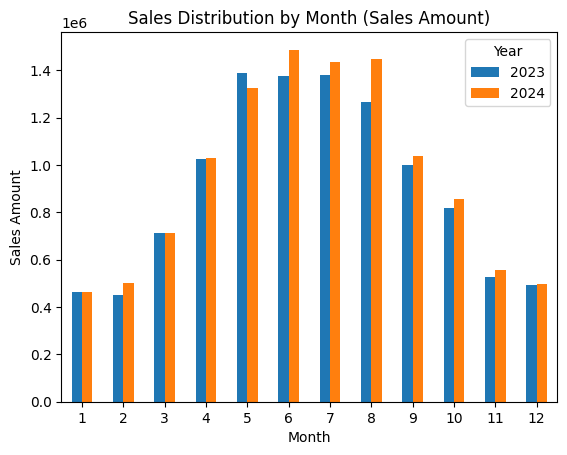

In [ ]:
# Convert SalesDate to datetime
sales_df["SalesDate"] = pd.to_datetime(sales_df["SalesDate"])

# Extract year and month from SalesDate
sales_df["Year"] = sales_df["SalesDate"].dt.year
sales_df["Month"] = sales_df["SalesDate"].dt.month

# Group by Year and Month, then sum the SalesAmount
sales_by_month_year = sales_df.groupby(["Year", "Month"])["SalesAmount"].sum().unstack(level=0)

# Plot the data
sales_by_month_year.plot(kind="bar", title="Sales Distribution by Month (Sales Amount)")
plt.xlabel("Month")
plt.ylabel("Sales Amount")
plt.xticks(rotation=0)  # Keep month labels horizontal
plt.legend(title="Year")  # Add a legend to distinguish between years
plt.show()

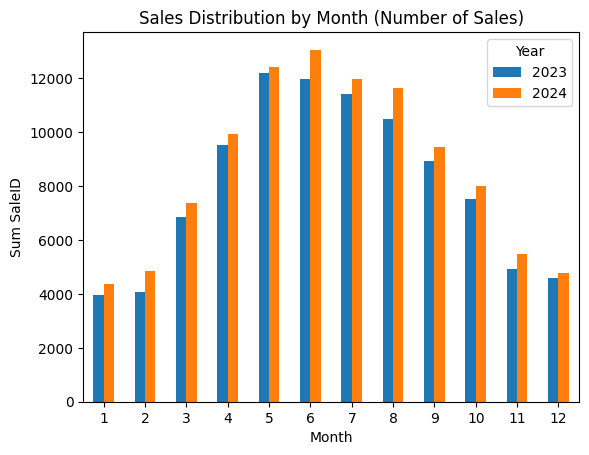

In [ ]:
# Convert SalesDate to datetime
sales_df["SalesDate"] = pd.to_datetime(sales_df["SalesDate"])

# Extract year and month from SalesDate
sales_df["Year"] = sales_df["SalesDate"].dt.year
sales_df["Month"] = sales_df["SalesDate"].dt.month

# Group by Year and Month, then count the Sale ID
sales_by_month_year = sales_df.groupby(["Year", "Month"])["SaleID"].count().unstack(level=0)

# Plot the data
sales_by_month_year.plot(kind="bar", title="Sales Distribution by Month (Number of Sales)")
plt.xlabel("Month")
plt.ylabel("Sum SaleID")
plt.xticks(rotation=0)  # Keep month labels horizontal
plt.legend(title="Year")  # Add a legend to distinguish between years
plt.show()

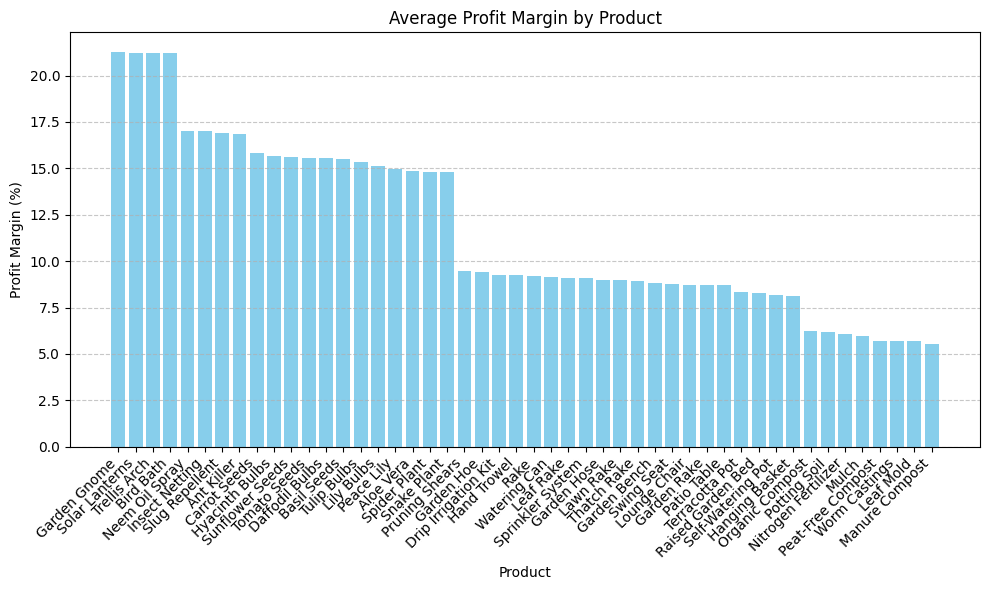

In [ ]:
# Profit Margin

# Merge sales_df with products_df to get CostPrice and ProductName
merged_df = pd.merge(sales_df, products_df[["ProductID", "ProductName", "CostPrice"]], on="ProductID", how="left")

# Calculate Profit Margin
merged_df["ProfitMargin"] = ((merged_df["SalesAmount"] - (merged_df["CostPrice"] * merged_df["Quantity"])) / merged_df["SalesAmount"]) * 100

# Group by Product and calculate the average profit margin
profit_margin_by_product = merged_df.groupby("ProductName")["ProfitMargin"].mean().reset_index()

# Sort by Profit Margin (optional)
profit_margin_by_product = profit_margin_by_product.sort_values(by="ProfitMargin", ascending=False)

# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(profit_margin_by_product["ProductName"], profit_margin_by_product["ProfitMargin"], color="skyblue")
plt.title("Average Profit Margin by Product")
plt.xlabel("Product")
plt.ylabel("Profit Margin (%)")
plt.xticks(rotation=45, ha="right")  # Rotate product names for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add grid lines for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [ ]:
campaigns_df.head(15)

,CampaignID,CampaignName,StartDate,Region,Budget,EndDate,Impact
0,1,Virtual exuding implementation,2023-09-19,Germany,225752.95,2023-11-06,1.093420
1,2,Triple-buffered value-added budgetary management,2024-09-13,Italy,43480.24,2024-10-24,1.099280
2,3,Re-contextualized bifurcated knowledge user,2023-08-08,UK,245392.46,2023-10-07,1.100000
3,4,Front-line high-level neural-net,2023-12-18,Germany,164049.06,2024-03-01,1.092998
4,5,Reduced asynchronous open architecture,2023-03-12,Netherlands,231409.89,2023-05-27,1.076054
5,6,Expanded asymmetric extranet,2023-07-31,Ireland,39267.10,2023-09-14,1.100000
6,7,Seamless directional middleware,2024-08-14,UK,94031.99,2024-10-19,1.100000
7,8,Virtual system-worthy emulation,2023-09-08,Netherlands,62398.50,2024-01-01,1.072955
8,9,Right-sized stable superstructure,2023-02-09,Italy,32868.31,2023-04-06,1.047681
9,10,Seamless reciprocal software,2023-12-17,Netherlands,158598.18,2024-04-11,1.077435


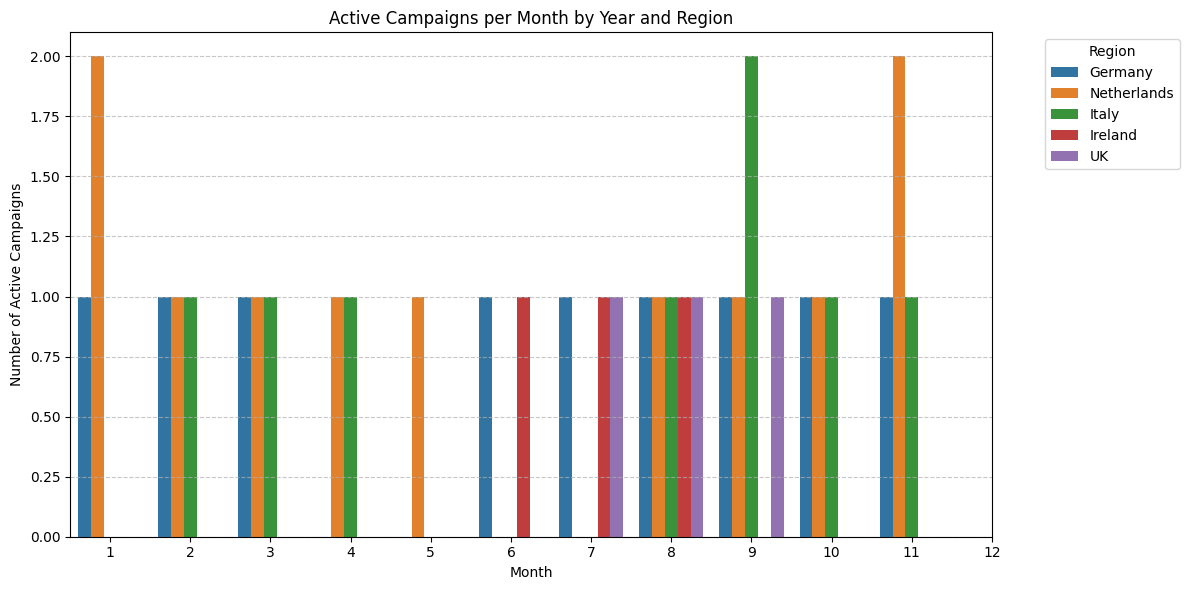

In [ ]:
# Active Marketing Campains
# Ensure StartDate and EndDate are in datetime format
campaigns_df['StartDate'] = pd.to_datetime(campaigns_df['StartDate'])
campaigns_df['EndDate'] = pd.to_datetime(campaigns_df['EndDate'])

# Extract year and month from StartDate and EndDate
campaigns_df['StartYear'] = campaigns_df['StartDate'].dt.year
campaigns_df['StartMonth'] = campaigns_df['StartDate'].dt.month
campaigns_df['EndYear'] = campaigns_df['EndDate'].dt.year
campaigns_df['EndMonth'] = campaigns_df['EndDate'].dt.month

# Initialize a dictionary to count active campaigns per year, month, and region
active_campaigns = {}

# Iterate through each row in the DataFrame
for _, row in campaigns_df.iterrows():
    start_year = row['StartYear']
    start_month = row['StartMonth']
    end_year = row['EndYear']
    end_month = row['EndMonth']
    region = row['Region']

    # Iterate through each month and year in the campaign's duration
    current_year = start_year
    current_month = start_month
    while (current_year < end_year) or (current_year == end_year and current_month <= end_month):
        key = (current_year, current_month, region)
        if key not in active_campaigns:
            active_campaigns[key] = 0
        active_campaigns[key] += 1

        # Move to the next month
        current_month += 1
        if current_month > 12:
            current_month = 1
            current_year += 1

# Convert dictionary to DataFrame
active_campaigns_df = pd.DataFrame(list(active_campaigns.items()), columns=['YearMonthRegion', 'ActiveCampaigns'])
active_campaigns_df[['Year', 'Month', 'Region']] = pd.DataFrame(active_campaigns_df['YearMonthRegion'].tolist(), index=active_campaigns_df.index)
active_campaigns_df = active_campaigns_df.drop(columns=['YearMonthRegion'])

# Sort the DataFrame by Year, Month, and Region
active_campaigns_df = active_campaigns_df.sort_values(by=['Year', 'Month', 'Region'])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=active_campaigns_df, x='Month', y='ActiveCampaigns', hue='Region', palette='tab10')

# Customize
plt.xticks(np.arange(12), labels=[f'{m}' for m in range(1, 13)])
plt.xlabel("Month")
plt.ylabel("Number of Active Campaigns")
plt.title("Active Campaigns per Month by Year and Region")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot

# Show plot
plt.tight_layout()
plt.show()

<ipython-input-7-29837de53a05>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  campaign_period['StartDate'] = pd.to_datetime(campaign_period['StartDate'])
<ipython-input-7-29837de53a05>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  campaign_period['EndDate'] = pd.to_datetime(campaign_period['EndDate'])


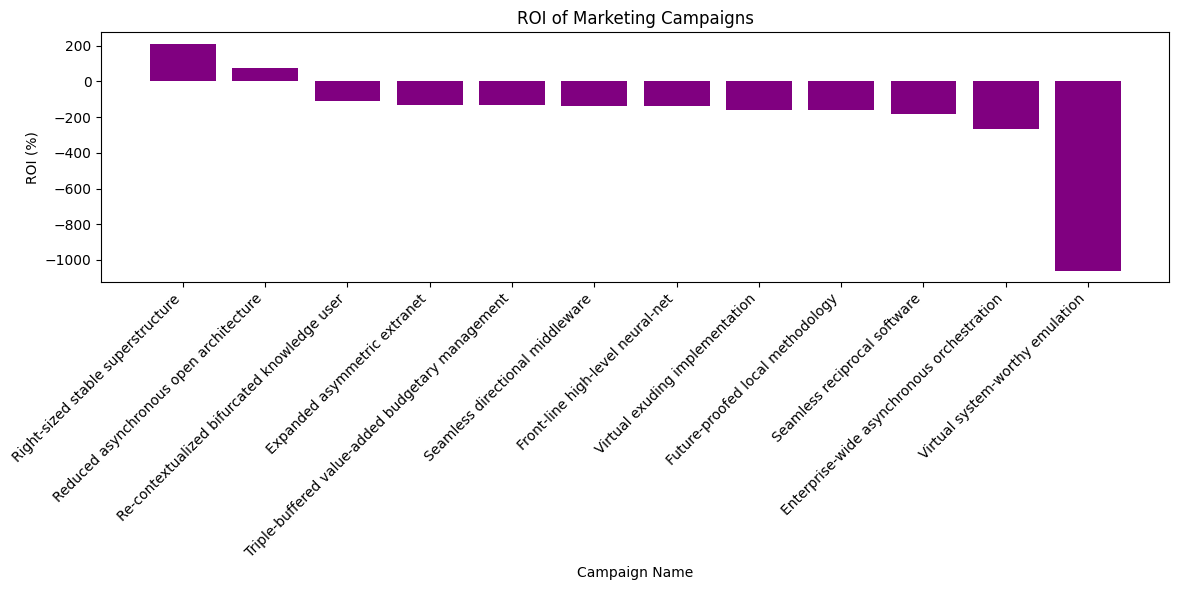

In [7]:
# Campaine ROI
# Step 1: Campaign Period
campaign_period = campaigns_df[["CampaignID", "CampaignName", "Region", "Budget", "StartDate", "EndDate"]]
# Convert 'StartDate' and 'EndDate' to datetime objects in campaign_period
campaign_period['StartDate'] = pd.to_datetime(campaign_period['StartDate'])
campaign_period['EndDate'] = pd.to_datetime(campaign_period['EndDate'])

# Step 2: Campaign Sales
campaign_sales = (
    sales_df.merge(campaign_period, left_on="Region", right_on="Region", how="inner")
    .query("SalesDate >= StartDate and SalesDate <= EndDate")  # Filter for campaign period
    .groupby(["CampaignID", "Region"])
    .agg(CampaignRevenue=("SalesAmount", "sum"), CampaignSalesCount=("SaleID", "nunique"))
    .reset_index()
)

campaign_days = (campaign_period['EndDate'] - campaign_period['StartDate']).dt.days + 1
baseline_sales = (
    sales_df.merge(campaign_period, left_on="Region", right_on="Region", how="inner")
    # Calculate the date (lenght of the campaign) days before the StartDate using a lambda function before the query
    .assign(BaselineStartDate=lambda x: x['StartDate'] - pd.to_timedelta(x['EndDate'] - x['StartDate']))
    .query("SalesDate >= BaselineStartDate and SalesDate < StartDate")  # Filter using the new column
    .groupby(["CampaignID", "Region"])
    .agg(BaselineRevenue=("SalesAmount", "sum"), BaselineSalesCount=("SaleID", "nunique"))
    .reset_index()
)

# Step 4: Acquired Customers
acquired_customers = (
    sales_df.merge(campaign_period, left_on="Region", right_on="Region", how="inner")
    .merge(customers_df, on="CustomerID", how="inner")
    .query("SalesDate >= StartDate and SalesDate <= EndDate and JoinDate >= StartDate and JoinDate <= EndDate")  # Filter for campaign period
    .groupby("CampaignID")
    .agg(NewCustomers=("CustomerID", "nunique"))
    .reset_index()
)

# Step 5: Calculate Metrics
campaign_metrics = (
    campaign_period
    .merge(campaign_sales, on=["CampaignID", "Region"], how="left")
    .merge(baseline_sales, on=["CampaignID", "Region"], how="left")
    .merge(acquired_customers, on="CampaignID", how="left")
    .assign(
        IncrementalRevenue=lambda x: x["CampaignRevenue"].fillna(0) - x["BaselineRevenue"].fillna(0),
        ROI_Percent=lambda x: ((x["IncrementalRevenue"] - x["Budget"]) / x["Budget"].replace(0, 1)) * 100,  # Handle division by zero
        CAC=lambda x: x["Budget"] / x["NewCustomers"].replace(0, 1)  # Handle division by zero
    )
)

# Step 6: Sort by ROI
campaign_metrics = campaign_metrics.sort_values(by="ROI_Percent", ascending=False)

# Step 7: Visualize ROI
plt.figure(figsize=(12, 6))
plt.bar(campaign_metrics["CampaignName"], campaign_metrics["ROI_Percent"], color="purple")
plt.xlabel("Campaign Name")
plt.ylabel("ROI (%)")
plt.title("ROI of Marketing Campaigns")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
print(customers_df.head())
print(customers_df.info())
print(customers_df.describe())

   CustomerID      CustomerName   Region Segment  LoyaltyScore  Age  Gender  \
0           1        Kyle Hines    Italy  Retail             8   64  Female   
1           2     Michael Myers  Germany  Retail            32   38  Female   
2           3  Courtney Johnson       UK  Retail            23   58  Female   
3           4    Malik Franklin  Germany  Retail            10   62    Male   
4           5   Jeremiah Miller    Spain  Retail             7   33    Male   

     JoinDate                       Email            PhoneNumber  \
0  2023-11-14           zlong@example.org       560-668-8669x695   
1  2021-06-09          ksilva@example.org        +1-236-874-5156   
2  2022-05-20  aliciaodonnell@example.com             3342849634   
3  2024-07-31     knappjohnny@example.com  001-376-678-0053x4397   
4  2021-10-23     edwardsadam@example.net      742-913-6830x2207   

   BuyingFrequency  
0                1  
1                9  
2                7  
3                1  
4          

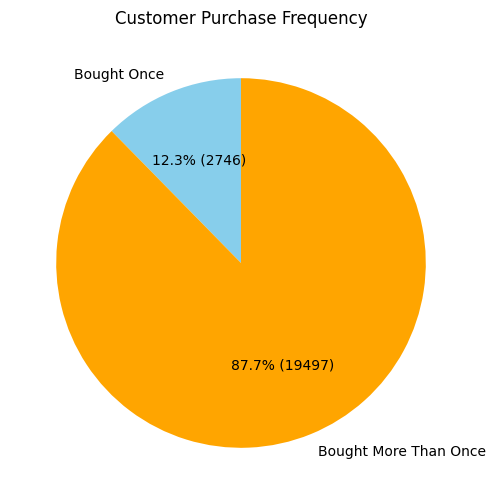

In [ ]:
# Churn rate - defined as one time buyers
# Group by CustomerID and count the number of purchases
customer_purchase_count = sales_df.groupby("CustomerID").size().reset_index(name="PurchaseCount")

# Categorize customers
bought_once = customer_purchase_count[customer_purchase_count["PurchaseCount"] == 1].shape[0]
bought_more_than_once = customer_purchase_count[customer_purchase_count["PurchaseCount"] > 1].shape[0]

# Data for visualization
categories = ["Bought Once", "Bought More Than Once"]
counts = [bought_once, bought_more_than_once]

# Function to display both percentage and real numbers
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f"{pct:.1f}% ({val})"
    return my_format

# Plot
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=categories, autopct=autopct_format(counts), colors=["skyblue", "orange"], startangle=90)
plt.title("Customer Purchase Frequency")
plt.show()

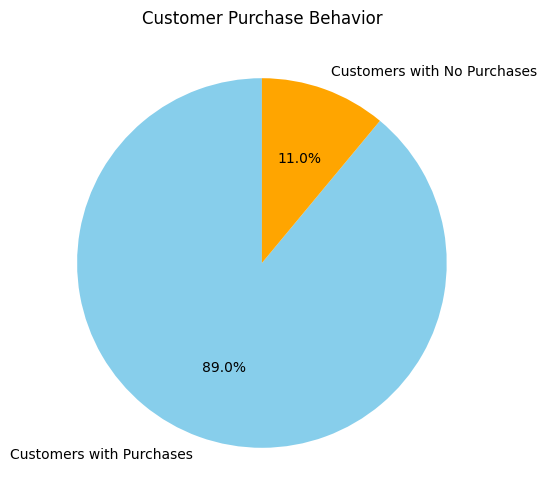

In [ ]:
#Customers who made a purchase vs customers without purchase
# Get all unique customers from the customers DataFrame
all_customers = customers_df["CustomerID"].unique()

# Get customers who made at least one purchase from the sales DataFrame
customers_with_purchases = sales_df["CustomerID"].unique()

# Find customers who never made a purchase
customers_with_no_purchases = set(all_customers) - set(customers_with_purchases)

# Count the number of customers in each category
num_customers_with_purchases = len(customers_with_purchases)
num_customers_with_no_purchases = len(customers_with_no_purchases)

# Data for visualization
categories = ["Customers with Purchases", "Customers with No Purchases"]
counts = [num_customers_with_purchases, num_customers_with_no_purchases]

# Plot
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=categories, autopct="%1.1f%%", colors=["skyblue", "orange"], startangle=90)
plt.title("Customer Purchase Behavior")
plt.show()


Text(0.5, 1.0, 'Loyalty Score Distribution')

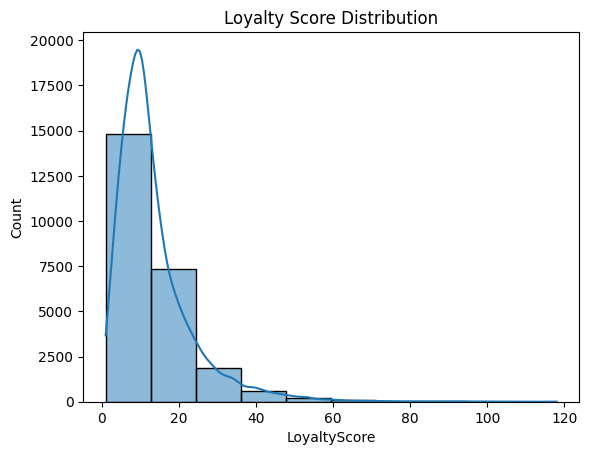

In [ ]:
sns.histplot(customers_df["LoyaltyScore"], bins=10, kde=True).set_title("Loyalty Score Distribution")

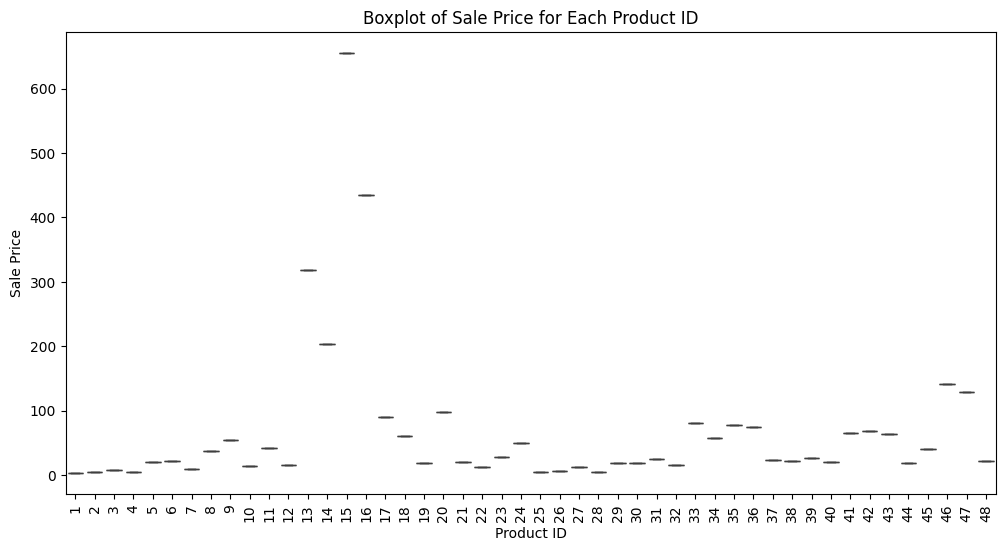

In [ ]:
# Set figure size
plt.figure(figsize=(12, 6))

# Create boxplot
sns.boxplot(data=sales_df, x='ProductID', y='Price')

# Customize plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel("Product ID")
plt.ylabel("Sale Price")
plt.title("Boxplot of Sale Price for Each Product ID")

# Show plot
plt.show()

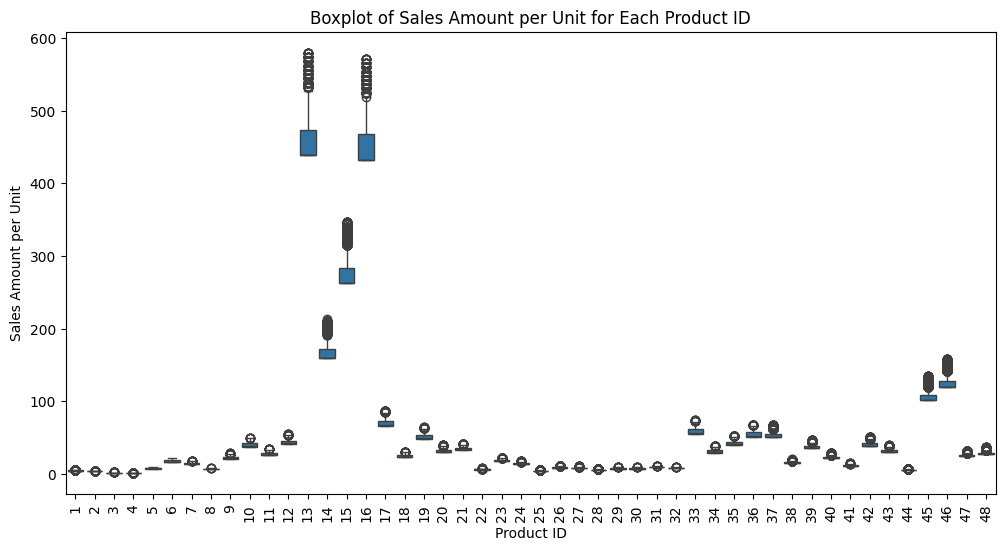

In [ ]:
# Calculate SalesAmount per unit
sales_df['SalesAmount_per_Unit'] = sales_df['SalesAmount'] / sales_df['Quantity']

# Set figure size
plt.figure(figsize=(12, 6))

# Create boxplot
sns.boxplot(data=sales_df, x='ProductID', y='SalesAmount_per_Unit')

# Customize plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel("Product ID")
plt.ylabel("Sales Amount per Unit")
plt.title("Boxplot of Sales Amount per Unit for Each Product ID")

# Show plot
plt.show()

In [ ]:
print(products_df.head())
print(products_df.info())
print(products_df.describe())

   ProductID      ProductName            Category  CostPrice  SellingPrice  \
0          1     Tomato Seeds               Seeds       3.84          5.76   
1          2      Basil Seeds               Seeds       3.09          4.63   
2          3  Sunflower Seeds               Seeds       1.38          2.07   
3          4     Carrot Seeds               Seeds       1.18          1.77   
4          5  Organic Compost  Soil & Fertilizers       7.35          9.55   

   Popularity  
0           3  
1           2  
2           1  
3           4  
4           5  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ProductID     48 non-null     int64  
 1   ProductName   48 non-null     object 
 2   Category      48 non-null     object 
 3   CostPrice     48 non-null     float64
 4   SellingPrice  48 non-null     float64
 5   Popularity    48 non-null  

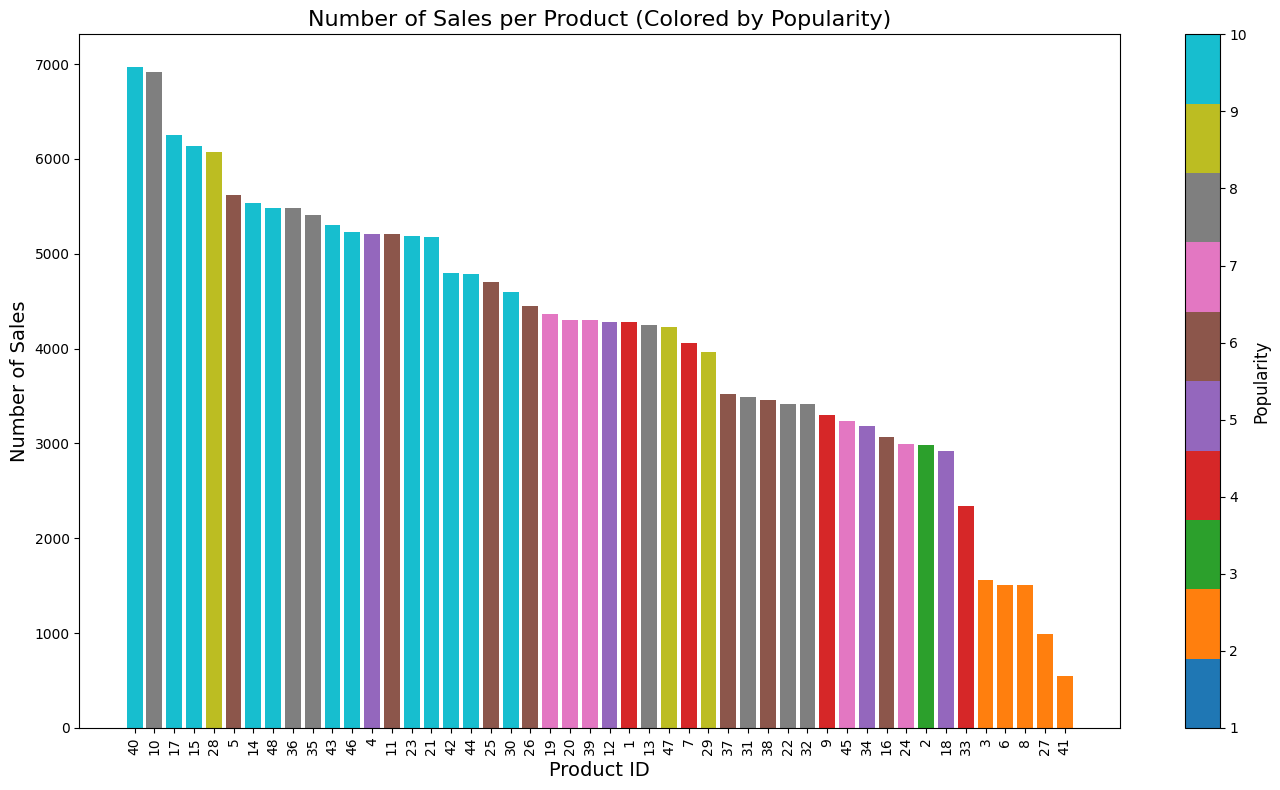

In [ ]:
# Merge sales_df with products_df to get popularity
sales_with_popularity = sales_df.merge(products_df[["ProductID", "Popularity"]], on="ProductID", how="left")

# Group by ProductID to count the number of sales
product_sales = sales_with_popularity.groupby("ProductID").size().reset_index(name="NumberOfSales")

# Merge with products_df to get popularity
product_sales = product_sales.merge(products_df[["ProductID", "Popularity"]], on="ProductID", how="left")

# Sort by NumberOfSales for better visualization
product_sales = product_sales.sort_values(by="NumberOfSales", ascending=False)


# Plot
plt.figure(figsize=(14, 8))
bars = plt.bar(
    product_sales["ProductID"].astype(str),  # Convert ProductID to string for better labeling
    product_sales["NumberOfSales"],
    color=plt.cm.tab10(product_sales["Popularity"]),  # Use tab10 colormap for popularity
)

# Add colorbar for popularity
sm = plt.cm.ScalarMappable(cmap=plt.cm.tab10, norm=plt.Normalize(vmin=product_sales["Popularity"].min(), vmax=product_sales["Popularity"].max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label("Popularity", fontsize=12)

# Labels and title
plt.title("Number of Sales per Product (Colored by Popularity)", fontsize=16)
plt.xlabel("Product ID", fontsize=14)
plt.ylabel("Number of Sales", fontsize=14)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show plot
plt.show()

<ipython-input-21-bb43062ee75a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_per_region, x="Region", y="SalesAmount", palette="viridis")


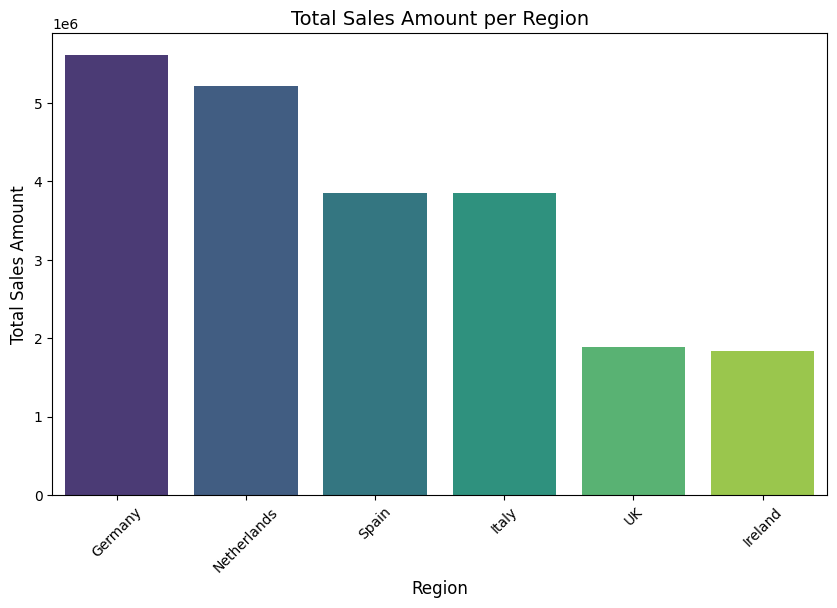

In [ ]:
# Group sales by region
sales_per_region = sales_df.groupby('Region', as_index=False)['SalesAmount'].sum()

# Sort values for better visualization
sales_per_region = sales_per_region.sort_values(by="SalesAmount", ascending=False)

# Set plot style
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_per_region, x="Region", y="SalesAmount", palette="viridis")

# Add labels and title
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total Sales Amount", fontsize=12)
plt.title("Total Sales Amount per Region", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Show the plot
plt.show()

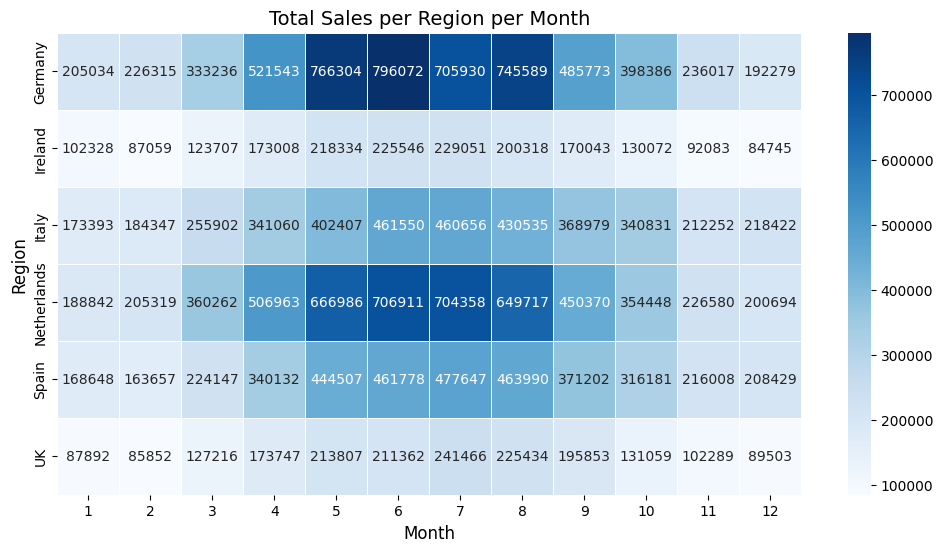

In [ ]:
# Ensure 'Date' is in datetime format
sales_df["SalesDate"] = pd.to_datetime(sales_df["SalesDate"])

# Extract year-month for grouping
sales_df["Month"] = sales_df["SalesDate"].dt.month

# Pivot table for heatmap
sales_pivot = sales_df.pivot_table(values="SalesAmount", index="Region", columns="Month", aggfunc="sum")

# Create heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(sales_pivot, cmap="Blues", annot=True, fmt=".0f", linewidths=0.5)

# Titles and labels
plt.title("Total Sales per Region per Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Region", fontsize=12)

# Show plot
plt.show()

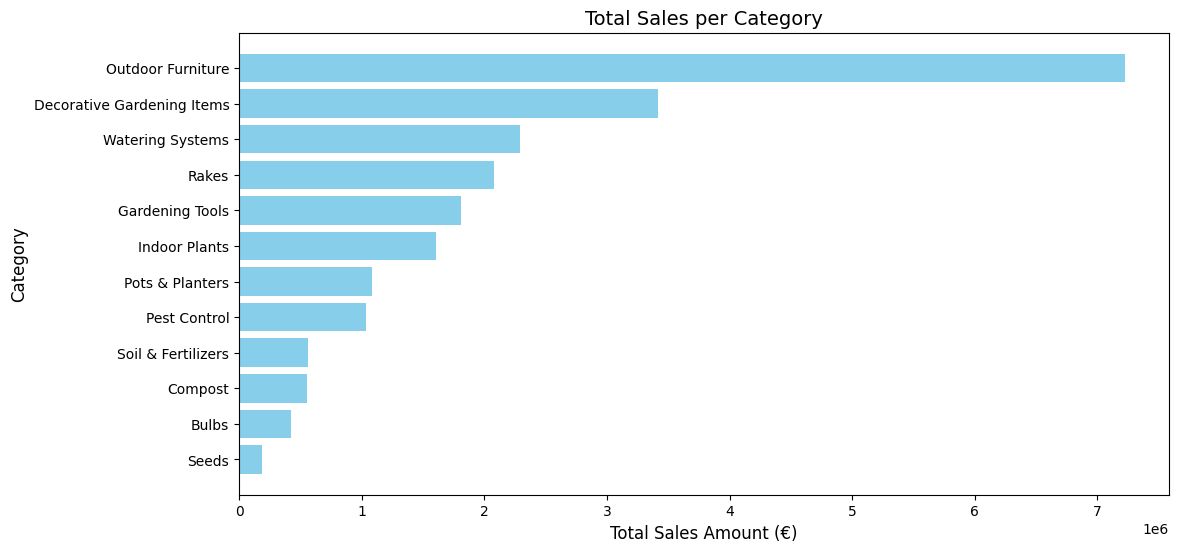

In [ ]:
# Merge sales_df with products_df to get category information
sales_with_category = sales_df.merge(products_df[["ProductID", "Category"]], on="ProductID", how="left")

# Group by category and sum sales amount
category_sales = sales_with_category.groupby("Category")["SalesAmount"].sum().reset_index()

# Sort categories by total sales
category_sales = category_sales.sort_values(by="SalesAmount", ascending=False)

# Plot
plt.figure(figsize=(12, 6))
plt.barh(category_sales["Category"], category_sales["SalesAmount"], color="skyblue")

# Labels and title
plt.xlabel("Total Sales Amount (€)", fontsize=12)
plt.ylabel("Category", fontsize=12)
plt.title("Total Sales per Category", fontsize=14)
plt.gca().invert_yaxis()  # Invert for better readability

# Show plot
plt.show()

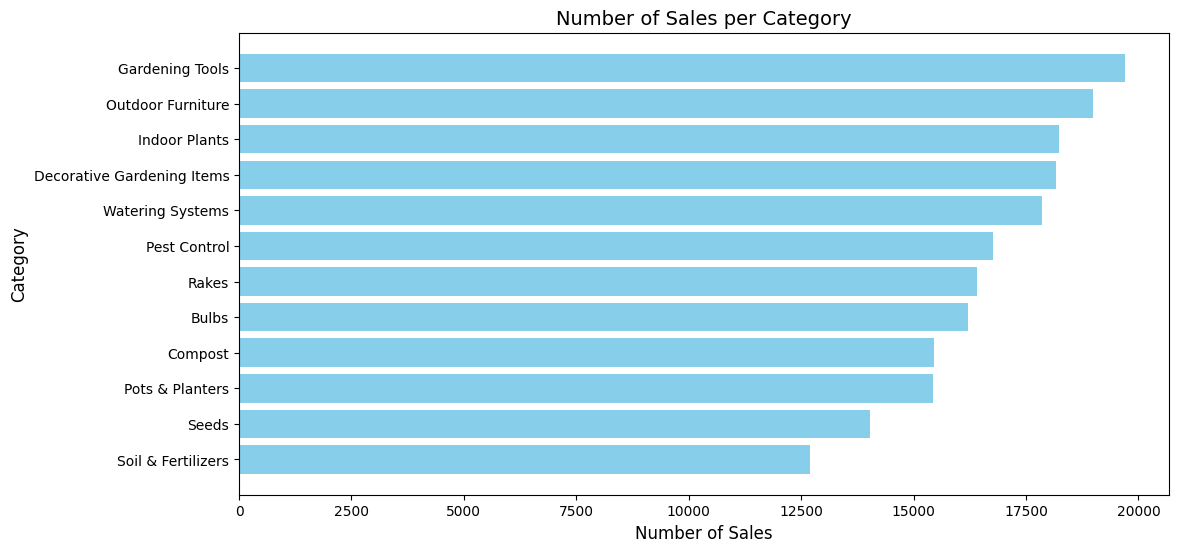

In [ ]:
# Merge sales_df with products_df to get category information
sales_with_category = sales_df.merge(products_df[["ProductID", "Category"]], on="ProductID", how="left")

# Group by category and count the number of sales (SaleID)
category_sales_count = sales_with_category.groupby("Category")["SaleID"].nunique().reset_index()

# Rename the column for clarity
category_sales_count = category_sales_count.rename(columns={"SaleID": "NumberOfSales"})

# Sort categories by number of sales
category_sales_count = category_sales_count.sort_values(by="NumberOfSales", ascending=False)

# Plot
plt.figure(figsize=(12, 6))
plt.barh(category_sales_count["Category"], category_sales_count["NumberOfSales"], color="skyblue")

# Labels and title
plt.xlabel("Number of Sales", fontsize=12)
plt.ylabel("Category", fontsize=12)
plt.title("Number of Sales per Category", fontsize=14)
plt.gca().invert_yaxis()  # Invert for better readability

# Show plot
plt.show()

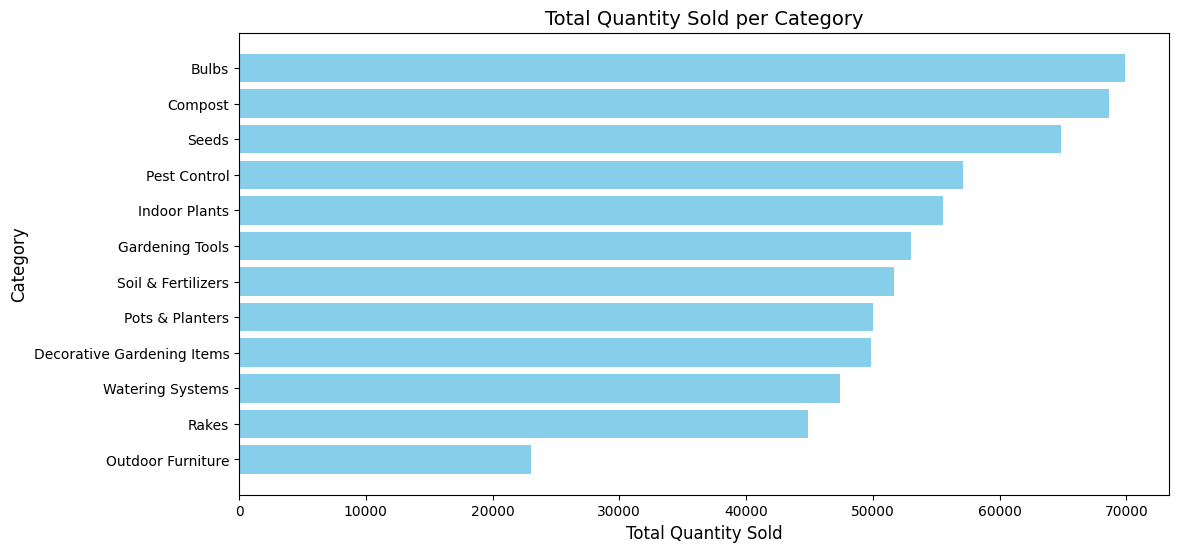

In [ ]:
# Merge sales_df with products_df to get category information
sales_with_category = sales_df.merge(products_df[["ProductID", "Category"]], on="ProductID", how="left")

# Group by category and sum the quantities sold
category_quantity_sold = sales_with_category.groupby("Category")["Quantity"].sum().reset_index()

# Rename the column for clarity
category_quantity_sold = category_quantity_sold.rename(columns={"Quantity": "TotalQuantitySold"})

# Sort categories by total quantity sold
category_quantity_sold = category_quantity_sold.sort_values(by="TotalQuantitySold", ascending=False)

# Plot
plt.figure(figsize=(12, 6))
plt.barh(category_quantity_sold["Category"], category_quantity_sold["TotalQuantitySold"], color="skyblue")

# Labels and title
plt.xlabel("Total Quantity Sold", fontsize=12)
plt.ylabel("Category", fontsize=12)
plt.title("Total Quantity Sold per Category", fontsize=14)
plt.gca().invert_yaxis()  # Invert for better readability

# Show plot
plt.show()

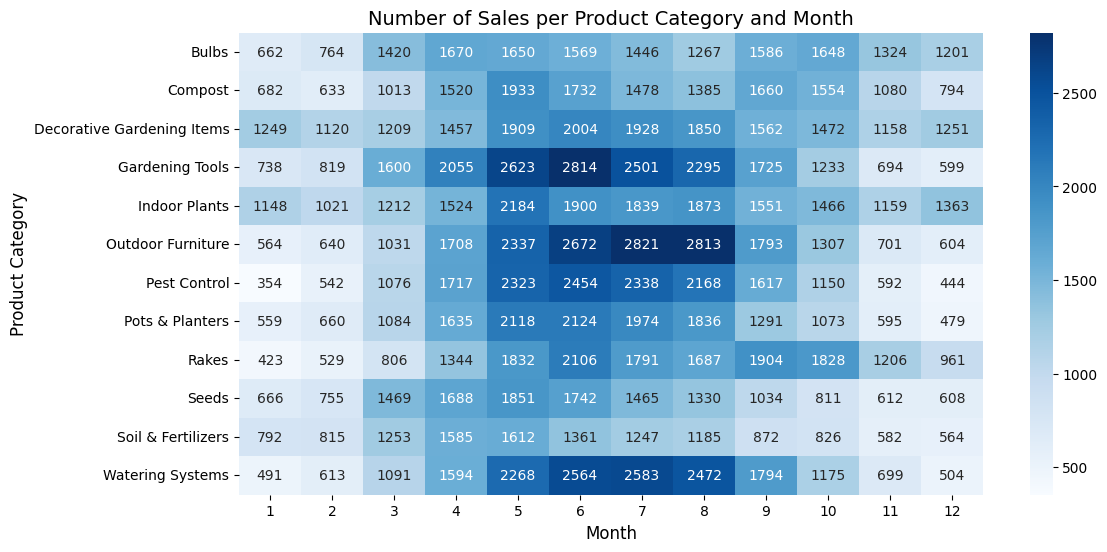

In [ ]:
# Convert 'Date' to datetime format if not already
sales_df['SalesDate'] = pd.to_datetime(sales_df['SalesDate'])

# Extract the month from the sales date
sales_df['Month'] = sales_df['SalesDate'].dt.month

# Merge sales data with product data to get product categories
sales_with_category = sales_df.merge(products_df[['ProductID', 'Category']], on='ProductID')

# Aggregate the number of sales per category and month
sales_summary = sales_with_category.groupby(['Category', 'Month']).size().unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(sales_summary, cmap='Blues', annot=True, fmt='d')

# Titles and labels
plt.title("Number of Sales per Product Category and Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Product Category", fontsize=12)

# Show plot
plt.show()

<ipython-input-27-c9385542810c>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_category_sales = sales_with_age.groupby(["AgeGroup", "Category"]).size().reset_index(name="NumberOfSales")
<ipython-input-27-c9385542810c>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_categories_per_age = age_category_sales.groupby("AgeGroup").apply(
<ipython-input-27-c9385542810c>:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` t

<Figure size 1200x800 with 0 Axes>

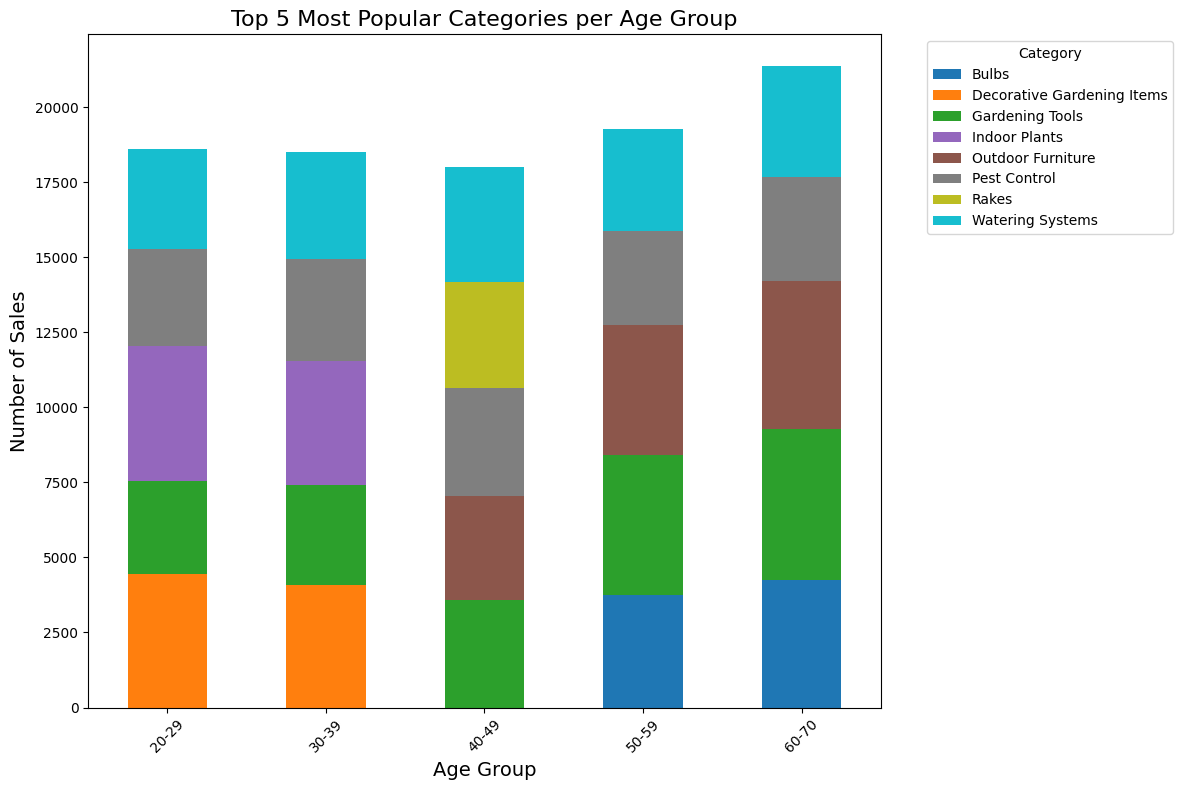

In [ ]:
# Product Category perference by age
# Merge Sales with Products to get 'Category'
sales_products_df = sales_df.merge(products_df[['ProductID', 'Category']], on='ProductID', how='left')

# Merge the result with Customers to get 'Age'
sales_with_age = sales_products_df.merge(customers_df[['CustomerID', 'Age']], on='CustomerID', how='left')

# Define age bins and labels (including 70)
bins = [20, 30, 40, 50, 60, 71]  # 71 ensures 70 is included
labels = ['20-29', '30-39', '40-49', '50-59', '60-70']

# Create AgeGroup column
sales_with_age['AgeGroup'] = pd.cut(sales_with_age['Age'], bins=bins, labels=labels, right=False)

# Group by AgeGroup and Category, then count the number of sales
age_category_sales = sales_with_age.groupby(["AgeGroup", "Category"]).size().reset_index(name="NumberOfSales")

# Get the top 5 categories for each age group
top_categories_per_age = age_category_sales.groupby("AgeGroup").apply(
    lambda x: x.nlargest(5, "NumberOfSales")
).reset_index(drop=True)

# Pivot the data for visualization
age_category_pivot = top_categories_per_age.pivot(index="AgeGroup", columns="Category", values="NumberOfSales")

# Plot
plt.figure(figsize=(12, 8))
age_category_pivot.plot(kind="bar", stacked=True, colormap="tab10", figsize=(12, 8))
plt.title("Top 5 Most Popular Categories per Age Group", fontsize=16)
plt.xlabel("Age Group", fontsize=14)
plt.ylabel("Number of Sales", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

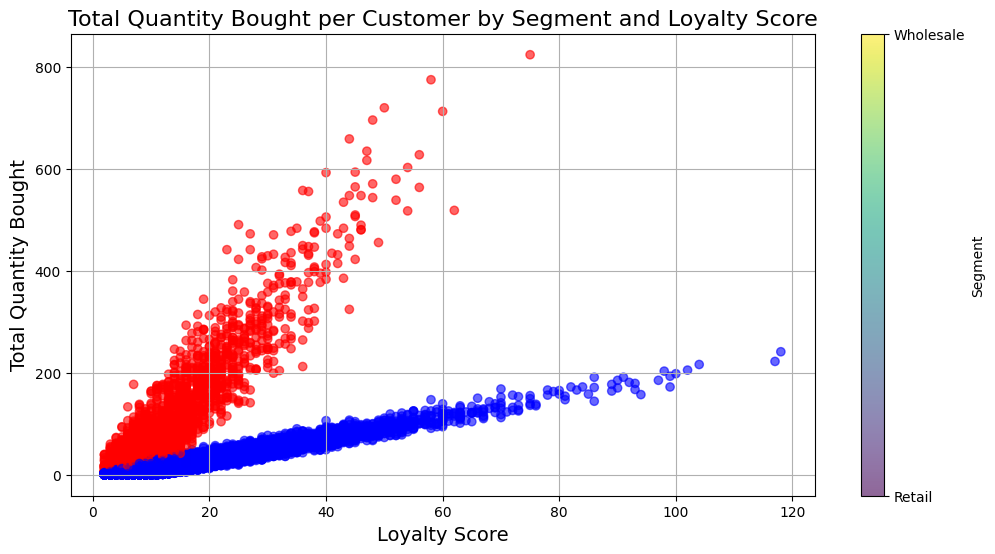

In [ ]:
# Group by CustomerID to sum the quantity bought
customer_quantity_sum = sales_df.groupby("CustomerID")["Quantity"].sum().reset_index(name="TotalQuantity")

# Merge with customers table to get segment and loyalty score
customer_quantity_with_info = customer_quantity_sum.merge(
    customers_df[["CustomerID", "Segment", "LoyaltyScore"]], on="CustomerID", how="left"
)

# Plot
plt.figure(figsize=(12, 6))
plt.scatter(
    customer_quantity_with_info["LoyaltyScore"],
    customer_quantity_with_info["TotalQuantity"],
    c=customer_quantity_with_info["Segment"].map({"Retail": "blue", "Wholesale": "red"}),
    alpha=0.6,
)
plt.title("Total Quantity Bought per Customer by Segment and Loyalty Score", fontsize=16)
plt.xlabel("Loyalty Score", fontsize=14)
plt.ylabel("Total Quantity Bought", fontsize=14)
plt.colorbar(ticks=[0, 1], label="Segment").set_ticklabels(["Retail", "Wholesale"])
plt.grid(True)
plt.show()

In [ ]:
print(returns_df.head())
print(returns_df.info())
print(returns_df.describe())

   ReturnID  SaleID  ReturnDate                   Reason
0        10   28059  2023-05-24               Wrong Item
1        14   62105  2023-08-17                Defective
2        18  132598  2024-06-18            Late Delivery
3        32  146407  2024-07-21  Damaged during shipping
4        38  155272  2024-08-16    Customer Changed Mind
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10651 entries, 0 to 10650
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ReturnID    10651 non-null  int64 
 1   SaleID      10651 non-null  int64 
 2   ReturnDate  10651 non-null  object
 3   Reason      10651 non-null  object
dtypes: int64(2), object(2)
memory usage: 333.0+ KB
None
            ReturnID         SaleID
count   10651.000000   10651.000000
mean    52031.322223   99934.851845
std     30219.019596   56809.413769
min        10.000000       0.000000
25%     25866.500000   51132.000000
50%     51761.000000  100174.000000
7

<Figure size 1200x800 with 0 Axes>

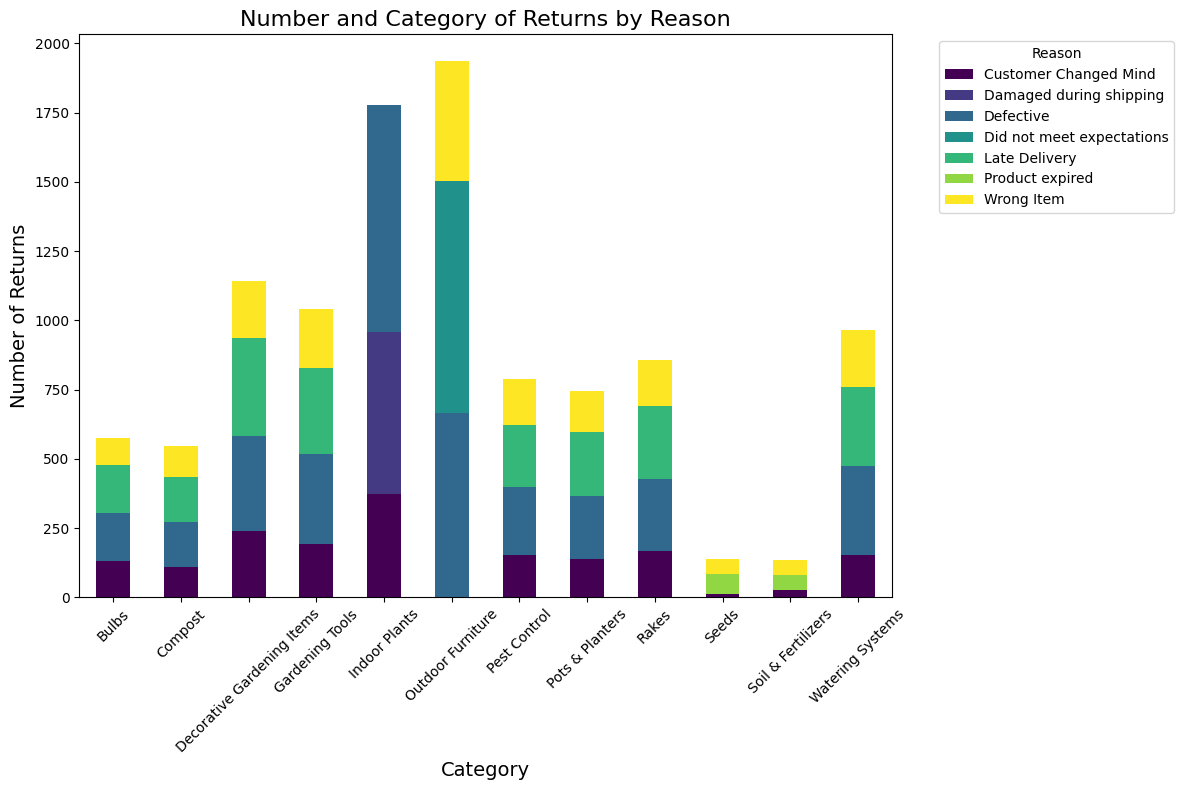

In [ ]:
# Convert returns list to a DataFrame
returns_df = pd.DataFrame(returns, columns=["ReturnID", "SaleID", "ReturnDate", "Reason"])

# Merge returns_df with sales_df to get ProductID
returns_with_product_id = returns_df.merge(sales_df[['SaleID', 'ProductID']], on='SaleID', how='left')

# Merge returns_with_product_id with products_df to get category information
returns_with_category = returns_with_product_id.merge(products_df[['ProductID', 'Category']], on='ProductID', how='left')

# Group by Category and Reason to count the number of returns
category_reason_returns = returns_with_category.groupby(["Category", "Reason"]).size().reset_index(name="NumberOfReturns")

# Pivot the data for visualization
pivot_table = category_reason_returns.pivot(index="Category", columns="Reason", values="NumberOfReturns")

# Fill NaN values with 0 (in case some categories don't have returns for certain reasons)
pivot_table = pivot_table.fillna(0)

# Ensure all values are numeric
pivot_table = pivot_table.apply(pd.to_numeric, errors="coerce")

# Plot
plt.figure(figsize=(12, 8))
pivot_table.plot(kind="bar", stacked=True, colormap="viridis", figsize=(12, 8))

# Labels and title
plt.title("Number and Category of Returns by Reason", fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Number of Returns", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Reason", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

# Show plot
plt.show()

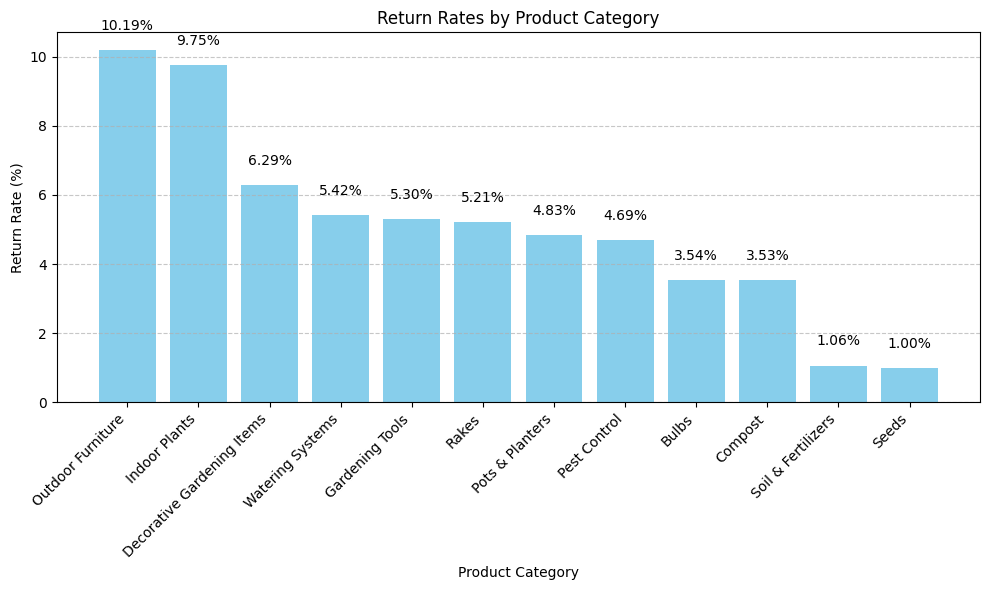

In [ ]:
# Return rates per product category
# Merge returns_df with sales_df to get ProductID
returns_with_products = pd.merge(returns_df, sales_df[["SaleID", "ProductID"]], on="SaleID", how="left")

# Merge returns_with_products with products_df to get Category
returns_with_category = pd.merge(returns_with_products, products_df[["ProductID", "Category"]], on="ProductID", how="left")

# Count the number of returns per category
returns_per_category = returns_with_category.groupby("Category").size().reset_index(name="ReturnCount")

# Count the total number of sales per category
sales_per_category = pd.merge(sales_df, products_df[["ProductID", "Category"]], on="ProductID", how="left")
sales_per_category = sales_per_category.groupby("Category").size().reset_index(name="SalesCount")

# Merge returns_per_category and sales_per_category
return_rates = pd.merge(returns_per_category, sales_per_category, on="Category", how="left")

# Calculate return rate
return_rates["ReturnRate"] = (return_rates["ReturnCount"] / return_rates["SalesCount"]) * 100

# Sort by ReturnRate (optional)
return_rates = return_rates.sort_values(by="ReturnRate", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(return_rates["Category"], return_rates["ReturnRate"], color="skyblue")
plt.title("Return Rates by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Return Rate (%)")
plt.xticks(rotation=45, ha="right")  # Rotate category names for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add return rates on top of bars
for i, rate in enumerate(return_rates["ReturnRate"]):
    plt.text(i, rate + 0.5, f"{rate:.2f}%", ha="center", va="bottom")

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
print(inventory_df.head())
print(inventory_df.info())
print(inventory_df.describe())

   ProductID  StockLevel  ReorderPoint
0          1        45.6            50
1          2        71.6            48
2          3        70.4            48
3          4        48.0            36
4          5        37.5            28
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ProductID     48 non-null     int64  
 1   StockLevel    48 non-null     float64
 2   ReorderPoint  48 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.3 KB
None
       ProductID  StockLevel  ReorderPoint
count      48.00   48.000000     48.000000
mean       24.50   56.529167     37.687500
std        14.00   14.723537      7.893321
min         1.00   27.800000     25.000000
25%        12.75   45.075000     32.000000
50%        24.50   56.800000     38.000000
75%        36.25   68.975000     45.000000
max        48.00   83.000000     50.000000


In [ ]:
print(not_realized_purchases_df.describe)
print(not_realized_purchases_df.info())
print(not_realized_purchases_df.describe())

<bound method NDFrame.describe of        SaleID   SalesDate  ProductID  CustomerID       Region  SalesAmount  \
0          20  2023-01-01          7        7934        Spain       685.55   
1          20  2023-01-01          5       17220        Spain       188.71   
2          45  2023-01-01          6        1033        Italy       136.13   
3         104  2023-01-01          5       21793  Netherlands       271.60   
4         123  2023-01-01          7        2478  Netherlands       406.62   
...       ...         ...        ...         ...          ...          ...   
13321  199711  2024-12-30         32       11304      Germany       394.29   
13322  199735  2024-12-30         28       24806      Germany        58.95   
13323  199780  2024-12-30         28       17514           UK        21.22   
13324  199785  2024-12-30         28       16264           UK        19.65   
13325  199802  2024-12-30         28       10113      Ireland        19.65   

       Price  DiscountRate  D

In [ ]:
print(inventory_snapshots_df.head())
print(inventory_snapshots_df.info())
print(inventory_snapshots_df.describe())

   SnapshotID  ProductID        Date  StockLevel SnapshotType
0           0        1.0  2023-01-01         5.6  pre_restock
1           1        2.0  2023-01-01         3.6  pre_restock
2           2        3.0  2023-01-01         7.4  pre_restock
3           3        4.0  2023-01-01        22.0  pre_restock
4           4        5.0  2023-01-01         0.5  pre_restock
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70176 entries, 0 to 70175
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SnapshotID    70176 non-null  int64  
 1   ProductID     70176 non-null  float64
 2   Date          70176 non-null  object 
 3   StockLevel    70176 non-null  float64
 4   SnapshotType  70176 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 2.7+ MB
None
         SnapshotID     ProductID    StockLevel
count  70176.000000  70176.000000  70176.000000
mean   35087.500000     24.500000     46.043274
std    2

In [ ]:
# Inventory Turnover
# Step 1: Calculate Total Cost of Goods Sold (COGS)
total_cogs = (
    sales_df.merge(products_df[["ProductID", "CostPrice"]], on="ProductID", how="left")
    .assign(COGS=lambda x: x["Quantity"] * x["CostPrice"])  # Calculate COGS for each sale
    ["COGS"].sum()  # Sum COGS for all products
)

# Step 2: Calculate Average Inventory at Cost
average_inventory_at_cost = (
    inventory_snapshots_df.merge(products_df[["ProductID", "CostPrice"]], on="ProductID", how="left")
    .assign(InventoryAtCost=lambda x: x["StockLevel"] * x["CostPrice"])  # Calculate Inventory at Cost for each snapshot
    ["InventoryAtCost"].mean()  # Average Inventory at Cost for all products
)

# Step 3: Calculate Inventory Turnover Ratio
inventory_turnover_ratio = total_cogs / average_inventory_at_cost

# Step 4: Print the result
print(f"Inventory Turnover Ratio: {inventory_turnover_ratio:.2f}")

Inventory Turnover Ratio: 8151.59


<ipython-input-36-5501d7ae56cc>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x["StockLevel"] == 0).mean() * 100


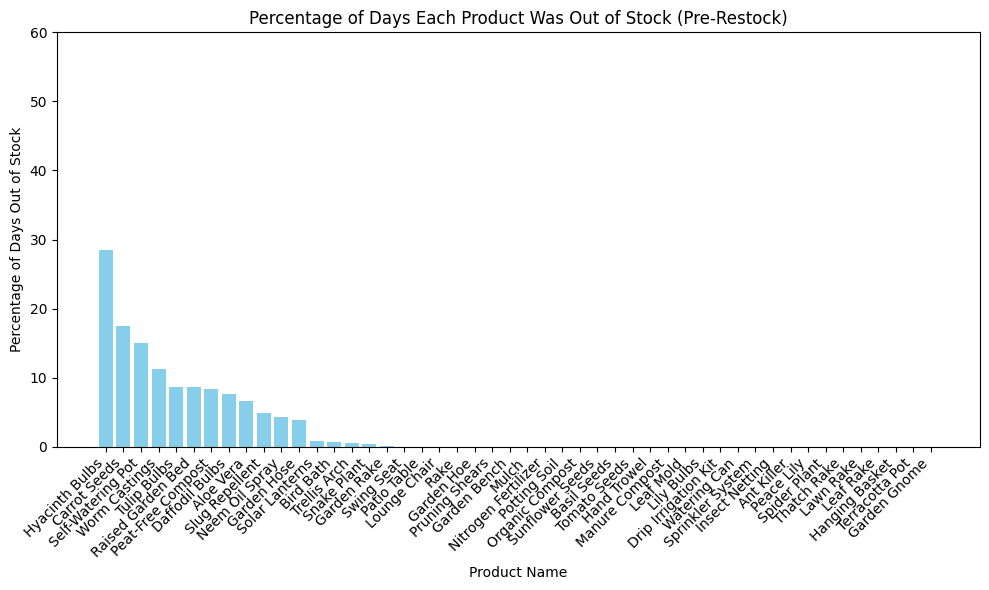

In [ ]:
# Out of stock
# Step 1: Filter for "pre_restock" snapshots
pre_restock_df = inventory_snapshots_df[inventory_snapshots_df["SnapshotType"] == "pre_restock"]

# Step 2: Calculate the percentage of days each product was out of stock
out_of_stock_percentage = (
    pre_restock_df.groupby("ProductID")
    .apply(lambda x: (x["StockLevel"] == 0).mean() * 100
).reset_index(name="OutOfStockPercentage"))

# Step 3: Merge with products_df to include product names
out_of_stock_percentage = out_of_stock_percentage.merge(
    products_df[["ProductID", "ProductName"]], on="ProductID", how="left"
)

# Step 4: Sort by OutOfStockPercentage for better visualization
out_of_stock_percentage = out_of_stock_percentage.sort_values(by="OutOfStockPercentage", ascending=False)

# Step 5: Visualize the results
plt.figure(figsize=(10, 6))
plt.bar(out_of_stock_percentage["ProductName"], out_of_stock_percentage["OutOfStockPercentage"], color="skyblue")
plt.xlabel("Product Name")
plt.ylabel("Percentage of Days Out of Stock")
plt.title("Percentage of Days Each Product Was Out of Stock (Pre-Restock)")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 60)
plt.tight_layout()
plt.show()

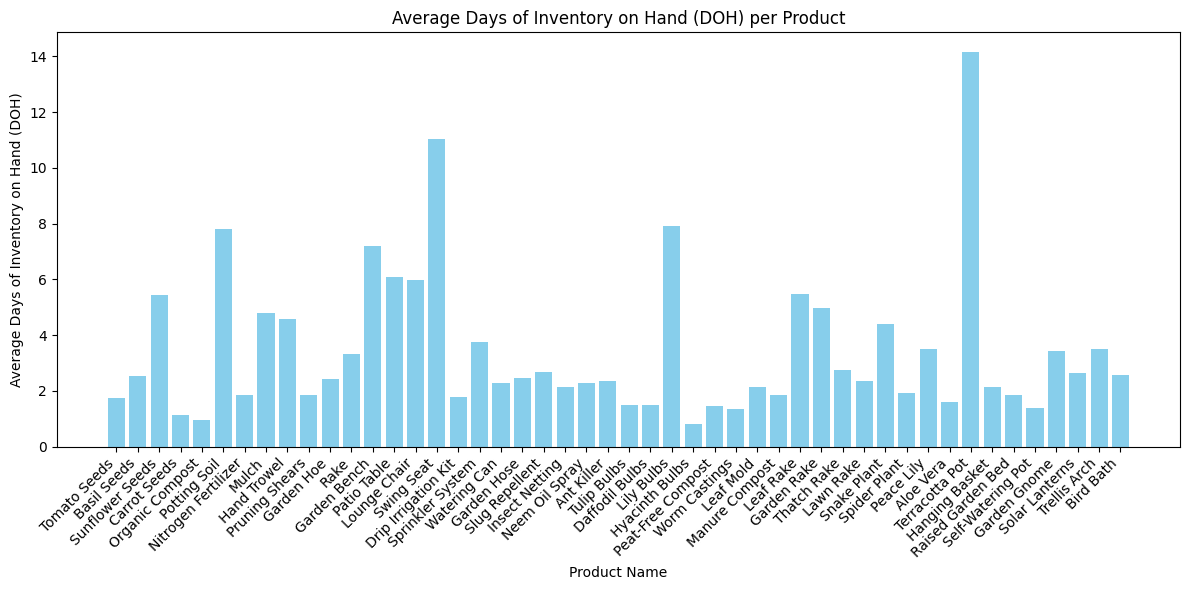

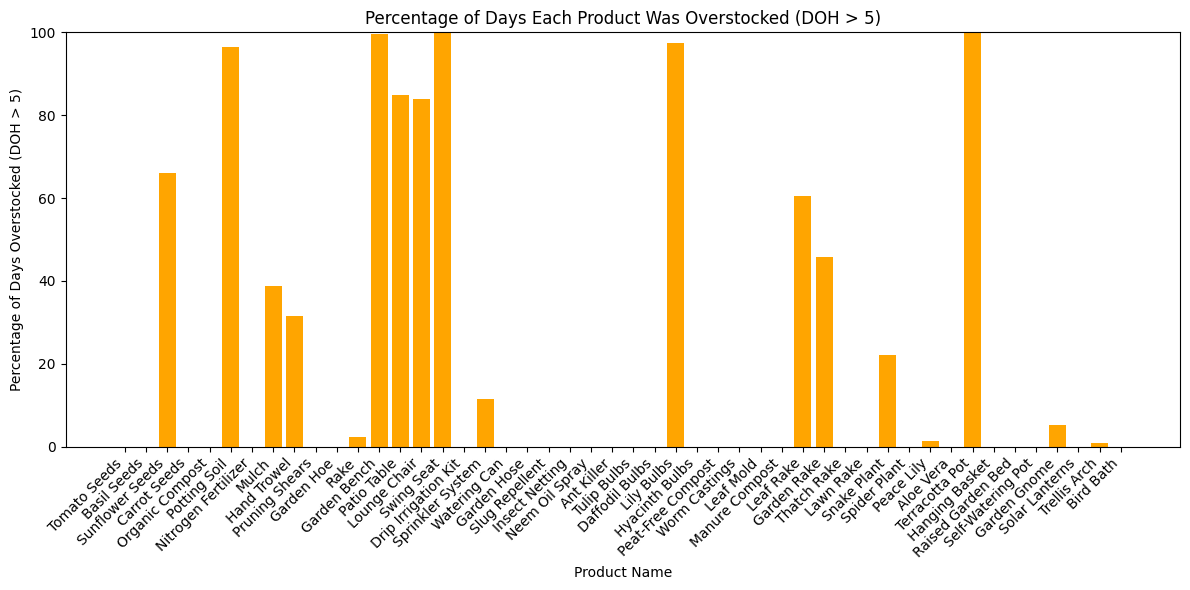

In [ ]:
# DOH and overstock
# Step 1: Calculate Daily Average Stock Level
daily_avg_stock = (
    inventory_snapshots_df.groupby(["ProductID", "Date"])
    .agg(AvgStockLevel=("StockLevel", "mean"))  # Average of pre_restock and post_restock
    .reset_index()
)

# Step 2: Calculate Average Daily Sales
# Aggregate total sales quantity per product
total_sales = (
    sales_df.groupby("ProductID")
    .agg(TotalSalesQuantity=("Quantity", "sum"))
    .reset_index()
)

# Calculate the number of days in the sales period
sales_period_days = pd.to_datetime(sales_df["SalesDate"]).nunique()

# Calculate Average Daily Sales
total_sales["AvgDailySales"] = total_sales["TotalSalesQuantity"] / sales_period_days

# Step 3: Merge Average Stock Level with Average Daily Sales
doh_data = daily_avg_stock.merge(total_sales, on="ProductID", how="left")

# Step 4: Calculate Days of Inventory on Hand (DOH)
doh_data["DOH"] = doh_data["AvgStockLevel"] / doh_data["AvgDailySales"]

# Step 5: Define Overstock (DOH > 5)
doh_data["Overstock"] = doh_data["DOH"] > 5

# Step 6: Aggregate DOH and Overstock by Product
product_doh = (
    doh_data.groupby("ProductID")
    .agg(
        AvgDOH=("DOH", "mean"),  # Average DOH per product
        OverstockPercentage=("Overstock", "mean")  # Percentage of days overstocked
    )
    .reset_index()
)

# Step 7: Merge with products_df to include ProductName
product_doh = product_doh.merge(
    products_df[["ProductID", "ProductName"]], on="ProductID", how="left"
)

# Step 8: Visualize Average DOH per Product
plt.figure(figsize=(12, 6))
plt.bar(product_doh["ProductName"], product_doh["AvgDOH"], color="skyblue")
plt.xlabel("Product Name")
plt.ylabel("Average Days of Inventory on Hand (DOH)")
plt.title("Average Days of Inventory on Hand (DOH) per Product")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Step 9: Visualize Overstock Percentage per Product
plt.figure(figsize=(12, 6))
plt.bar(product_doh["ProductName"], product_doh["OverstockPercentage"] * 100, color="orange")
plt.xlabel("Product Name")
plt.ylabel("Percentage of Days Overstocked (DOH > 5)")
plt.title("Percentage of Days Each Product Was Overstocked (DOH > 5)")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, 100)  # Set y-axis limit to 0-100%
plt.tight_layout()
plt.show()

In [ ]:
# Average of sold items per day

# Aggregate total sales quantity across all products
total_quantity_sold = sales_df["Quantity"].sum()

# Calculate the number of unique days in the sales period
sales_period_days = pd.to_datetime(sales_df["SalesDate"]).nunique()

# Calculate Average Daily Sales (across all products)
avg_daily_sales_all_products = total_quantity_sold / sales_period_days /48

# Output the result
print(f"Average quantity of products sold per day: {avg_daily_sales_all_products}")

Average quantity of products sold per day: 18.12363201094391
